# Predicting Annual Medical Costs — Regression Problem

Healthcare organizations, insurers, and policy makers depend on accurate cost forecasting to make informed decisions. Medical expenses vary widely across individuals due to differences in demographics, chronic conditions, lifestyle behaviors, and healthcare utilization patterns.

This project focuses on building a **machine learning regression model** that predicts a patient's **annual medical cost** based on a wide range of influential features.

---

## Problem Statement

The goal is to **predict the continuous target variable:**

### **`annual_medical_cost`**

using patient-level information such as:

- **Demographics:** age, sex, region, education level  
- **Clinical Measurements:** chronic disease count, diabetes, hypertension, systolic/diastolic BP, BMI, HbA1c  
- **Healthcare Utilization:** visits_last_year, claims_count  
- **Insurance Factors:** plan_type, network_tier, monthly and annual premiums  
- **Lifestyle Factors:** smoking status, alcohol frequency, urban/rural residence  

---

## Why This Problem Matters

Accurately predicting medical costs has significant real-world importance:

###  **1. Financial Planning**
Hospitals and insurers can more reliably estimate future spending and allocate budgets.

###  **2. Personalized Risk Adjustment**
Insurers can tailor premium pricing and identify members who may require more support.

###  **3. Resource Allocation**
Early identification of potential high-cost individuals enables proactive interventions.

###  **4. Actuarial & Policy Modeling**
Improves long-term forecasting models used by governments and health systems.

---

##  Project Outcome

By the end of the modeling process, we will:

- Build and evaluate regression models such as:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
  - **Gradient Boosting / XGBoost** (optional)
- Measure performance using:
  - **RMSE**, **MAE**, **R²**
- Analyze **feature importance** to understand which variables drive medical costs.
- Produce a deployable prediction pipeline for real-world usage.

---

This sets the stage for a meaningful regression analysis that mirrors challenges faced in real healthcare analytics systems.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = R"C:\Users\ninah\OneDrive\Desktop\DR DENIS\Midterm_Project\dataset\medical_insurance.csv"
df = pd.read_csv(path)
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


In [2]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [4]:
#person_id is just an identifier, it carries no predictive information and will only add noise to your models. 
# we drop it
df = df.drop(columns=['person_id'])
df

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,...,0,1,0,1,0,2,0,1,0,0
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,...,0,1,1,0,0,1,0,1,1,0
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,...,0,0,1,1,0,2,1,0,1,0
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,...,0,0,0,1,0,0,1,0,0,0
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,0,...,0,0,0,0,0,1,0,0,0,0
99996,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,0,...,0,0,0,0,0,0,0,0,0,0
99997,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,0,...,0,0,0,1,0,1,0,0,0,0
99998,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,2,...,0,0,1,0,0,2,2,1,0,0


In [5]:
print(df['alcohol_freq'])
print(df['alcohol_freq'].nunique())
print(df['alcohol_freq'].unique())
print(df['alcohol_freq'].value_counts())

0               NaN
1            Weekly
2               NaN
3               NaN
4             Daily
            ...    
99995    Occasional
99996    Occasional
99997        Weekly
99998    Occasional
99999           NaN
Name: alcohol_freq, Length: 100000, dtype: object
3
[nan 'Weekly' 'Daily' 'Occasional']
alcohol_freq
Occasional    45078
Weekly        19833
Daily          5006
Name: count, dtype: int64


In [6]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Unknown')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  object 
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  object 
 12  alcohol_freq                 100000 non-null  object 
 13  

In [8]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = list(set(df.columns) - set(categorical_columns))

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

Numerical Columns:
['hospitalizations_last_3yrs', 'mental_health', 'deductible', 'kidney_disease', 'medication_count', 'cancer_history', 'claims_count', 'diabetes', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'arthritis', 'copd', 'liver_disease', 'annual_premium', 'monthly_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'cardiovascular_disease', 'policy_term_years', 'hba1c', 'annual_medical_cost', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'asthma', 'income', 'ldl']


# Defining the Target Variable for Regression

In this regression project, our objective is to predict an individual’s annual medical cost based on demographic, lifestyle, medical history, and insurance-related features.

# Target Variable

    **'annual medical cost'**
This is the numerical value the model will learn to predict.

In [9]:

target = 'annual_medical_cost'


X = df.drop(columns=[target])

y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (100000, 52)
y shape: (100000,)


## Target Varible EDA

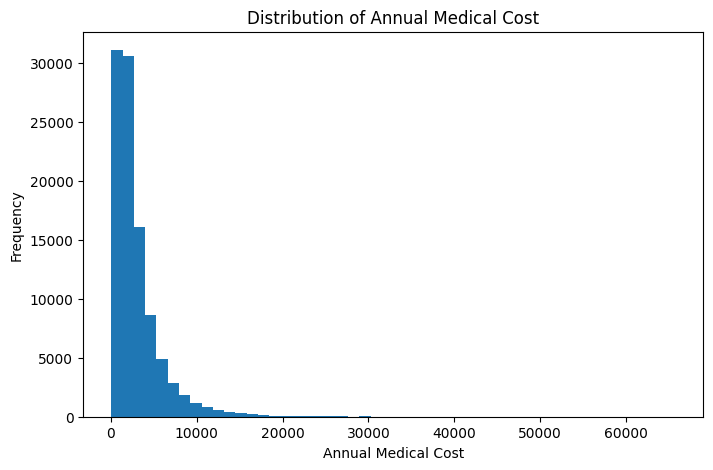

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['annual_medical_cost'], bins=50)
plt.title("Distribution of Annual Medical Cost")
plt.xlabel("Annual Medical Cost")
plt.ylabel("Frequency")
plt.show()


In [11]:
df[target].describe()

count    100000.000000
mean       3009.451907
std        3127.462822
min          55.550000
25%        1175.117500
50%        2082.575000
75%        3707.957500
max       65724.900000
Name: annual_medical_cost, dtype: float64

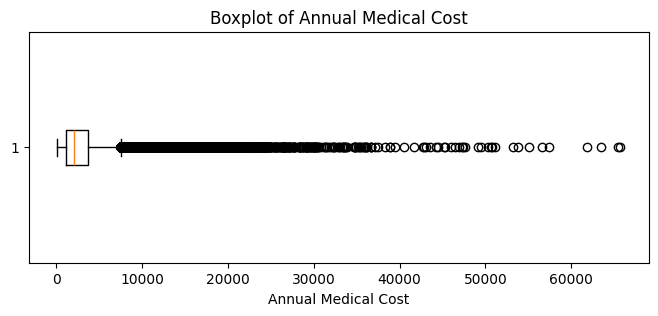

In [12]:
plt.figure(figsize=(8,3))
plt.boxplot(df['annual_medical_cost'], vert=False)
plt.title("Boxplot of Annual Medical Cost")
plt.xlabel("Annual Medical Cost")
plt.show()


# Target Variable Skewness — `annual_medical_cost`

The distribution of the target variable is **highly right-skewed**, as indicated by the following summary statistics:

| Statistic | Value |
|-----------|-------|
| Mean | 3,009.45 |
| Median (50%) | 2,082.57 |
| Standard Deviation | 3,127.46 |
| Minimum | 55.55 |
| Maximum | 65,724.90 |

## Observations

- Most patients have **moderate medical costs**, while a **few incur extremely high costs**
- The distribution has a **long right tail**, suggesting the presence of **high-cost outliers**

## Impact on Modeling

This skewness can **negatively affect regression model performance** if not properly addressed.

In [13]:
df['annual_medical_cost_log'] = np.log1p(df['annual_medical_cost'])

df['annual_medical_cost_log'].describe()

count    100000.000000
mean          7.645302
std           0.851406
min           4.035125
25%           7.069974
50%           7.641840
75%           8.218506
max          11.093248
Name: annual_medical_cost_log, dtype: float64

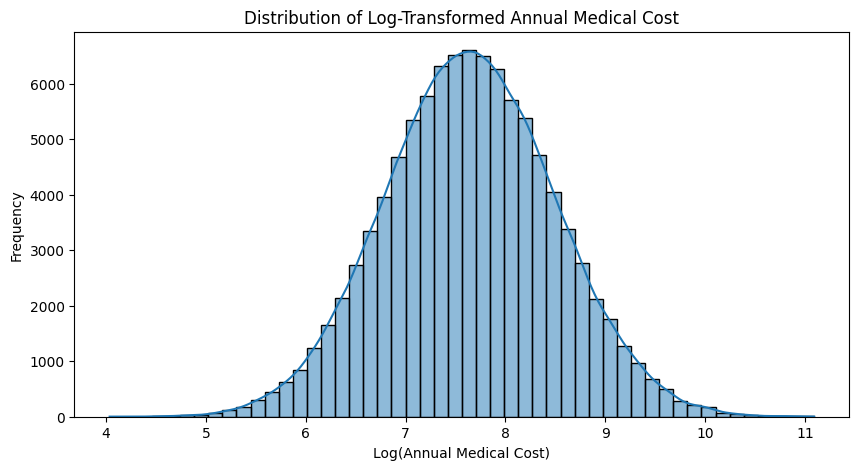

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['annual_medical_cost_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Annual Medical Cost')
plt.xlabel('Log(Annual Medical Cost)')
plt.ylabel('Frequency')
plt.show()


In [15]:
df = df.drop(columns=['annual_medical_cost'])
df = df.rename(columns={'annual_medical_cost_log': 'annual_medical_cost'})

In [16]:
df.head()

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,...,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure,annual_medical_cost
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,...,1,0,1,0,2,0,1,0,0,8.844922
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,...,1,1,0,0,1,0,1,1,0,7.398548
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,...,0,1,1,0,2,1,0,1,0,8.944030
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,...,0,0,1,0,0,1,0,0,0,8.543108
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,...,1,0,2,0,1,1,0,1,0,7.439401


In [17]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = list(set(df.columns) - set(categorical_columns))

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

Numerical Columns:
['hospitalizations_last_3yrs', 'mental_health', 'deductible', 'kidney_disease', 'medication_count', 'cancer_history', 'claims_count', 'diabetes', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'arthritis', 'copd', 'liver_disease', 'annual_premium', 'monthly_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'cardiovascular_disease', 'policy_term_years', 'hba1c', 'annual_medical_cost', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'asthma', 'income', 'ldl']


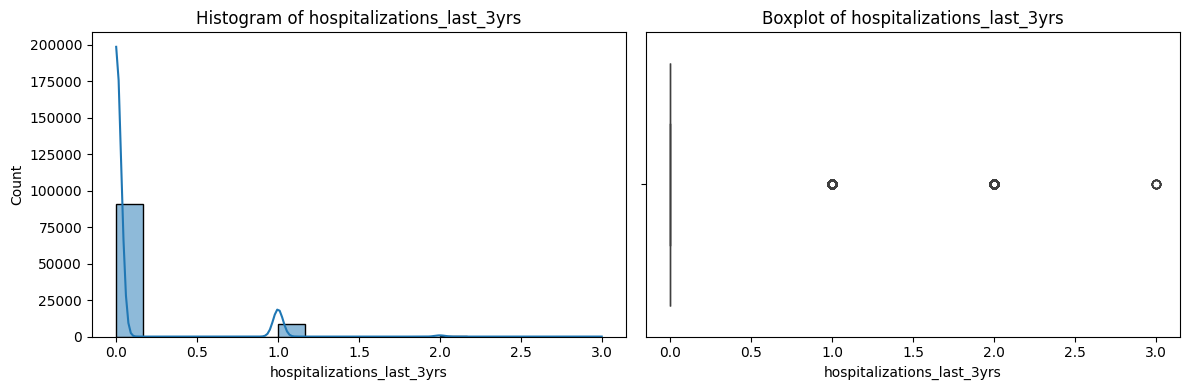

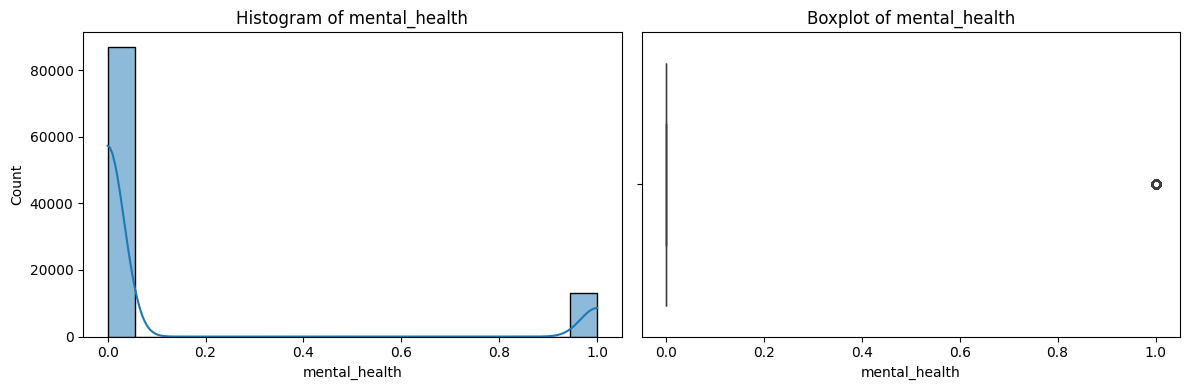

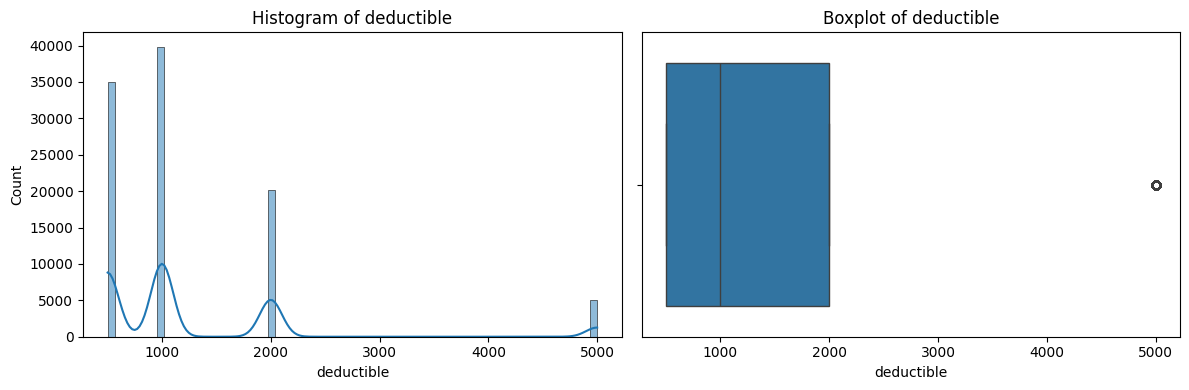

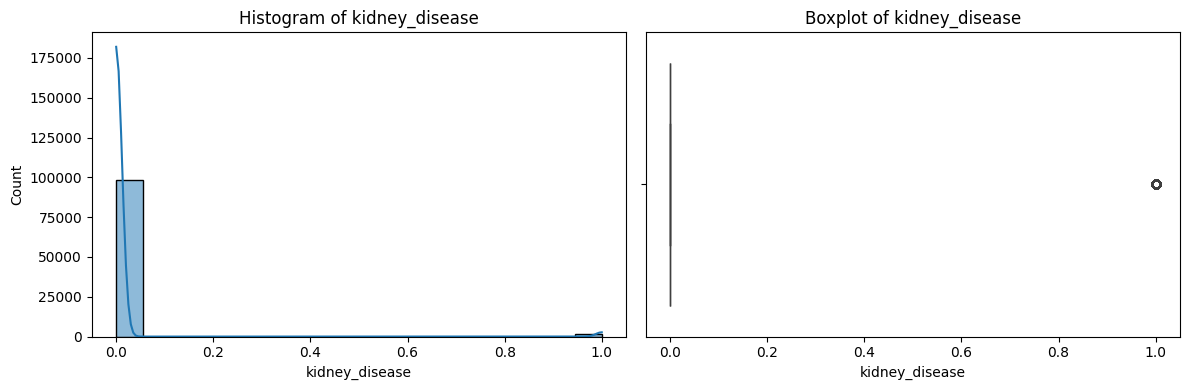

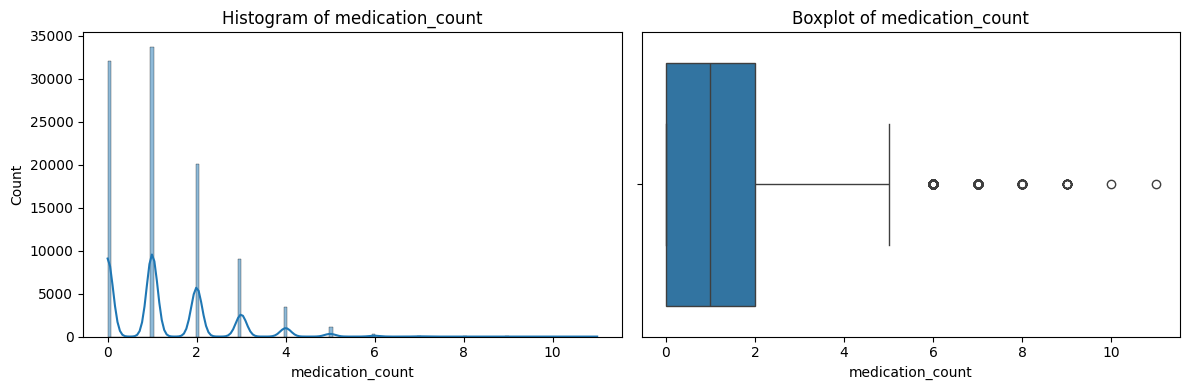

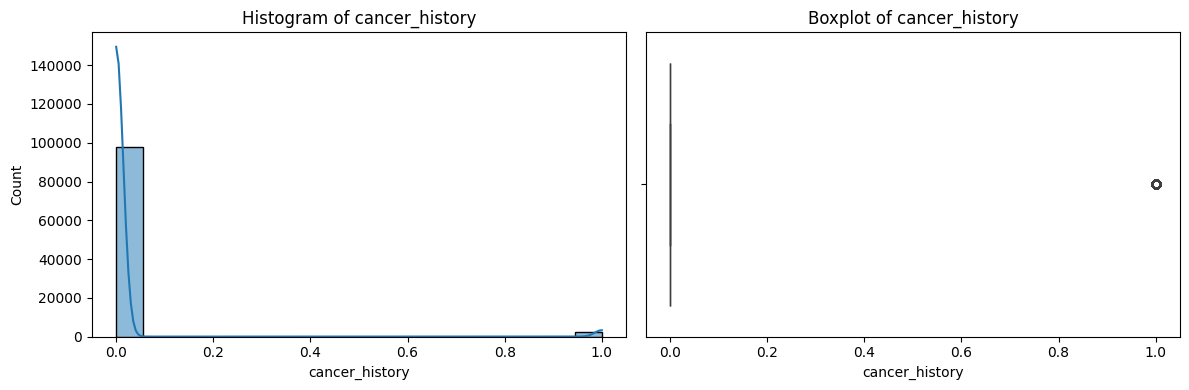

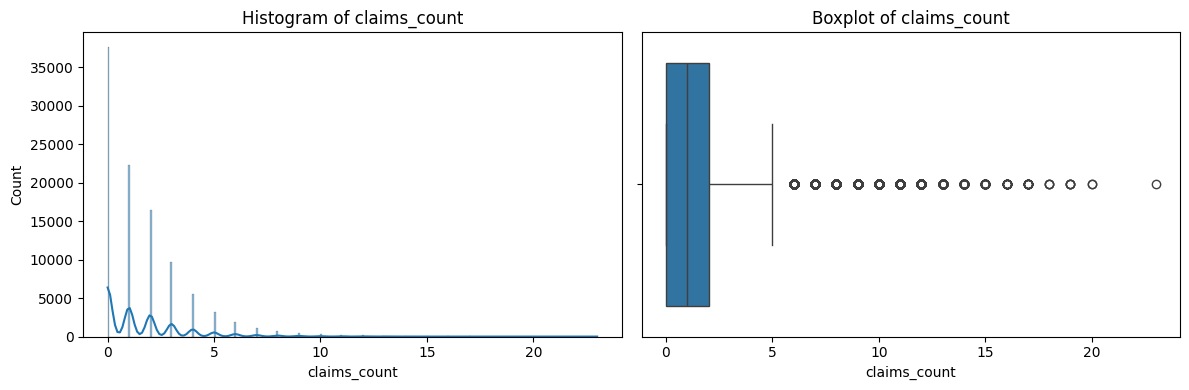

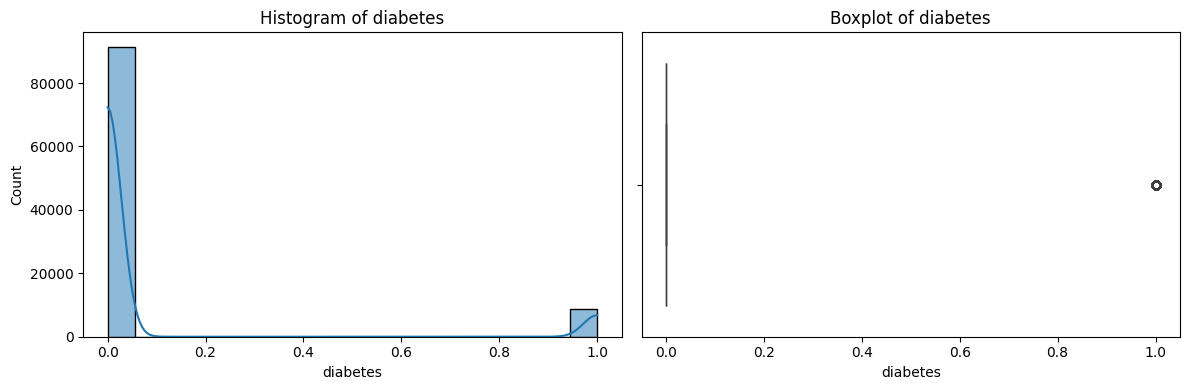

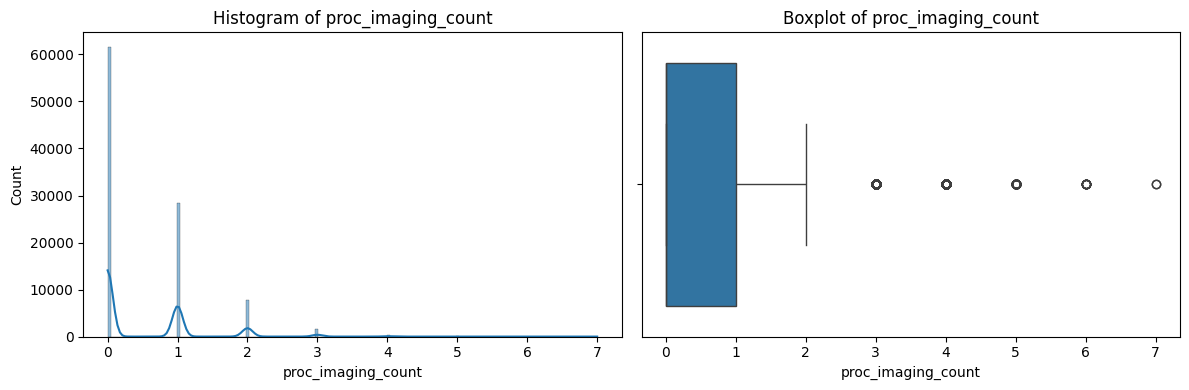

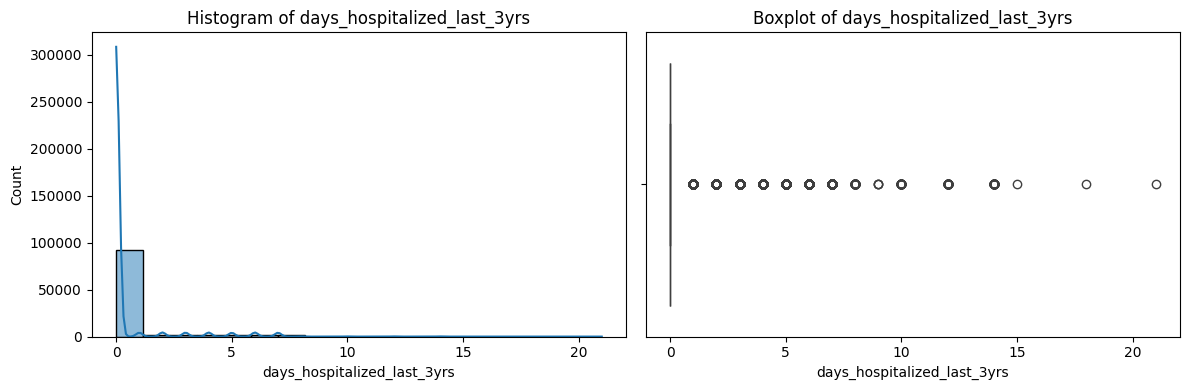

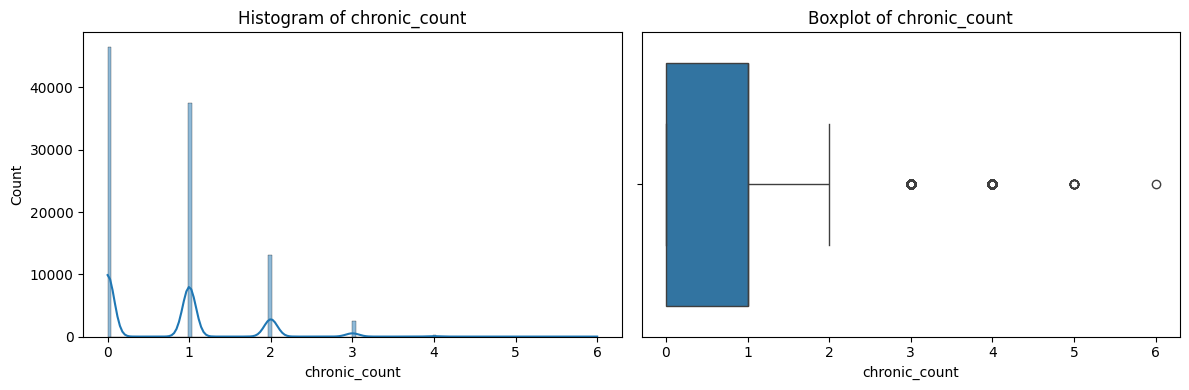

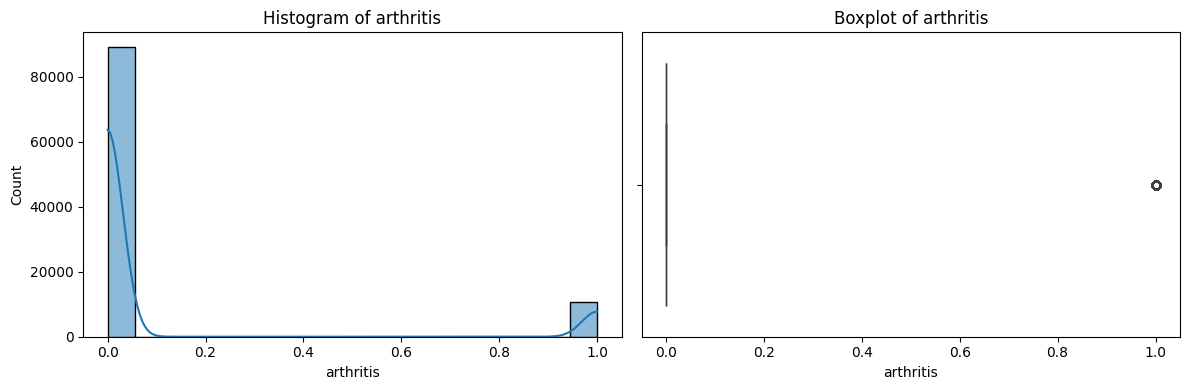

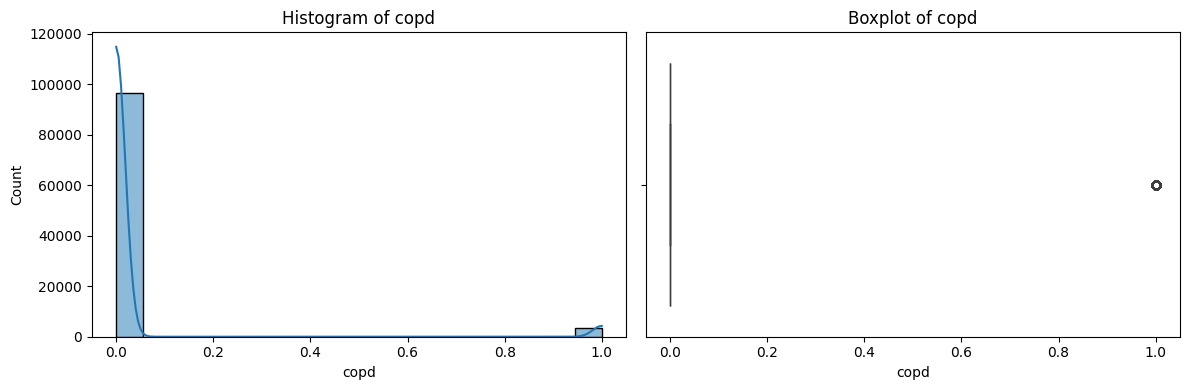

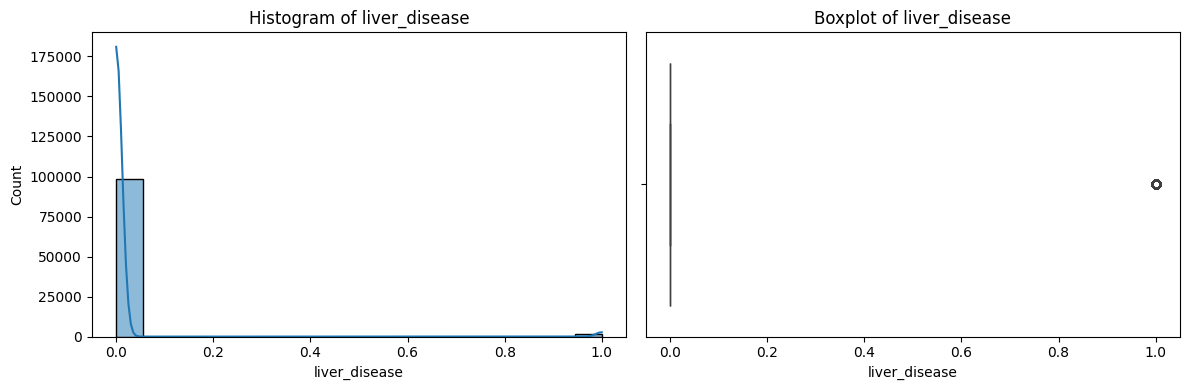

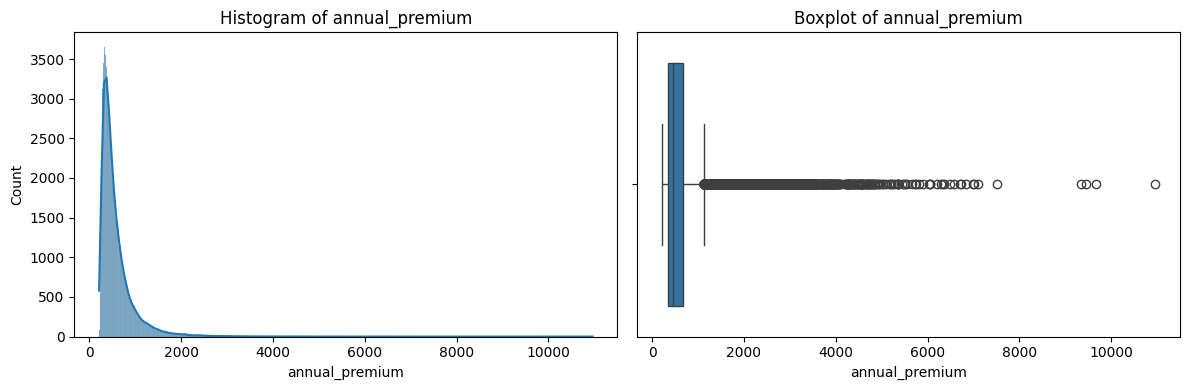

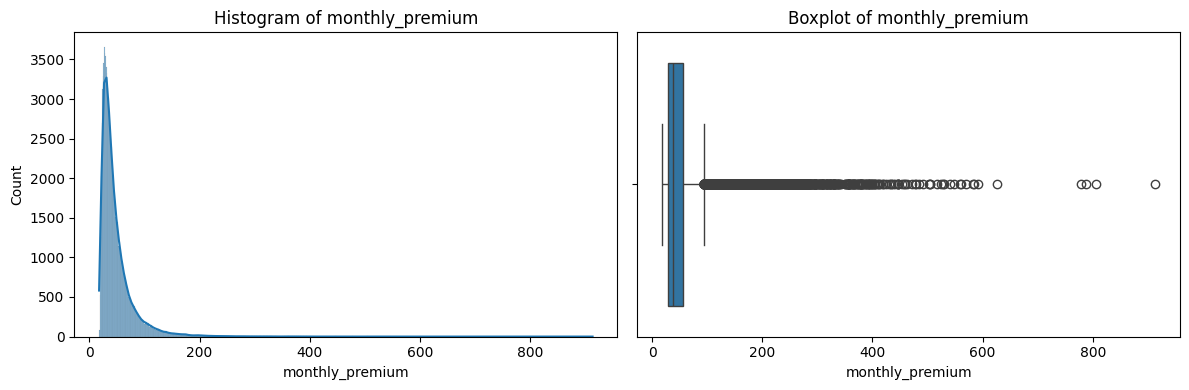

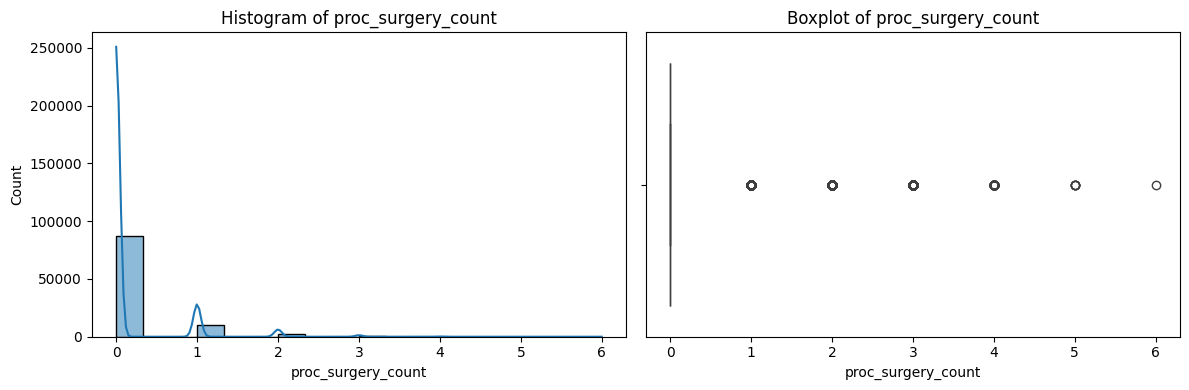

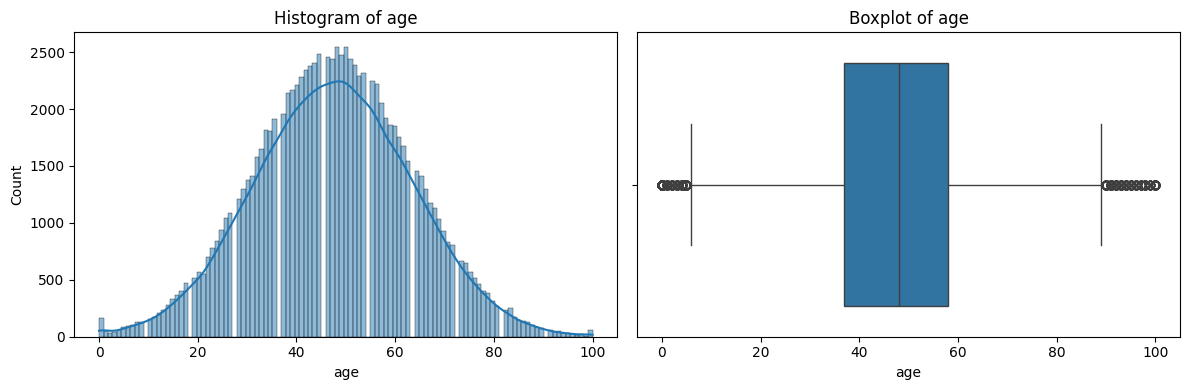

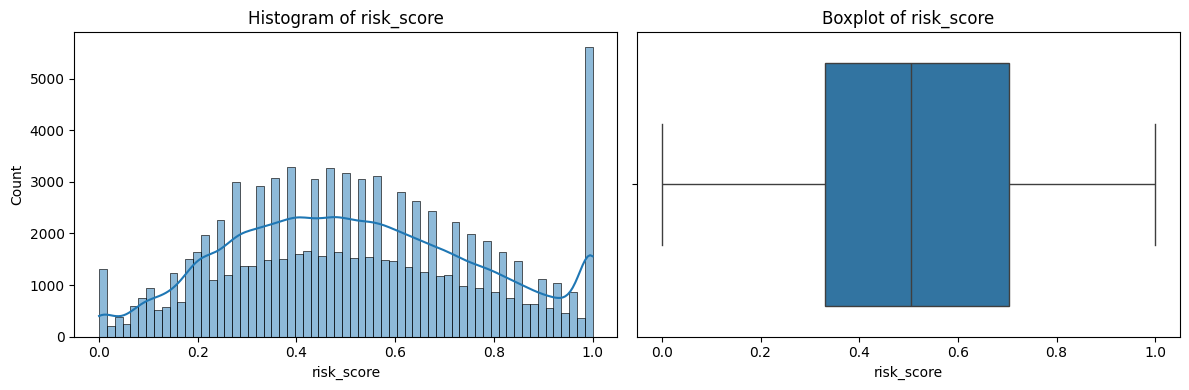

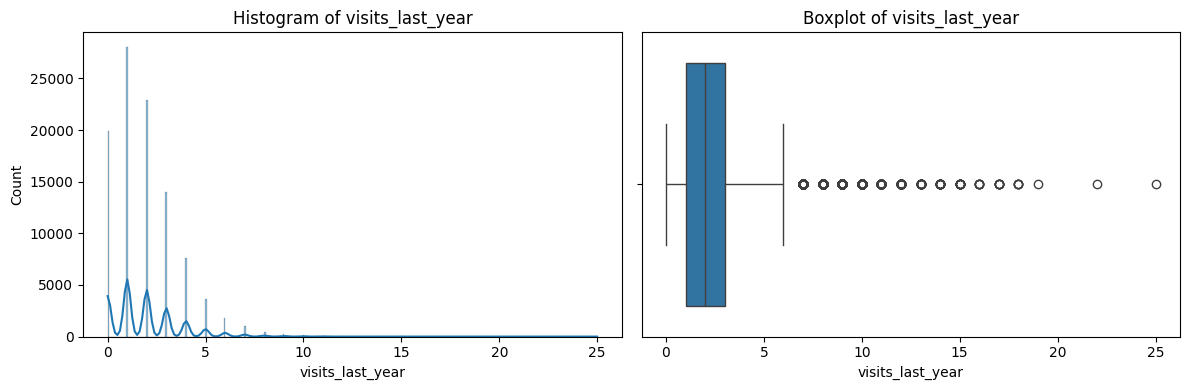

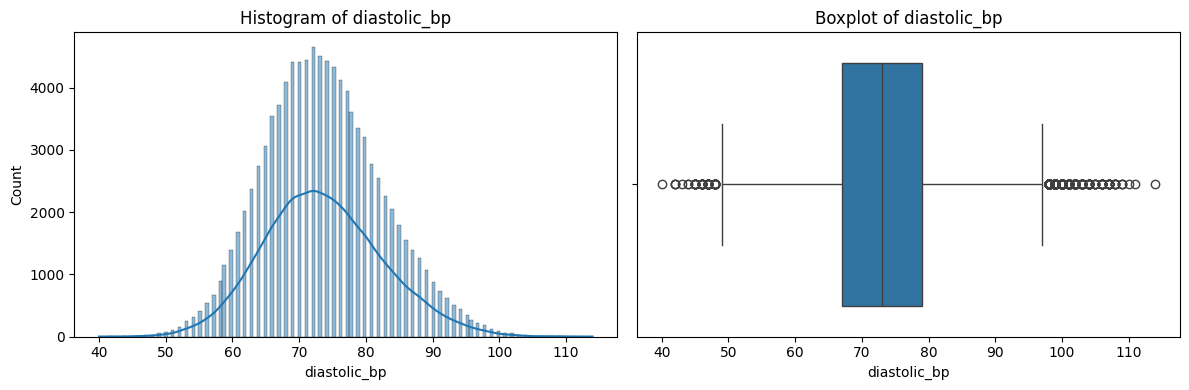

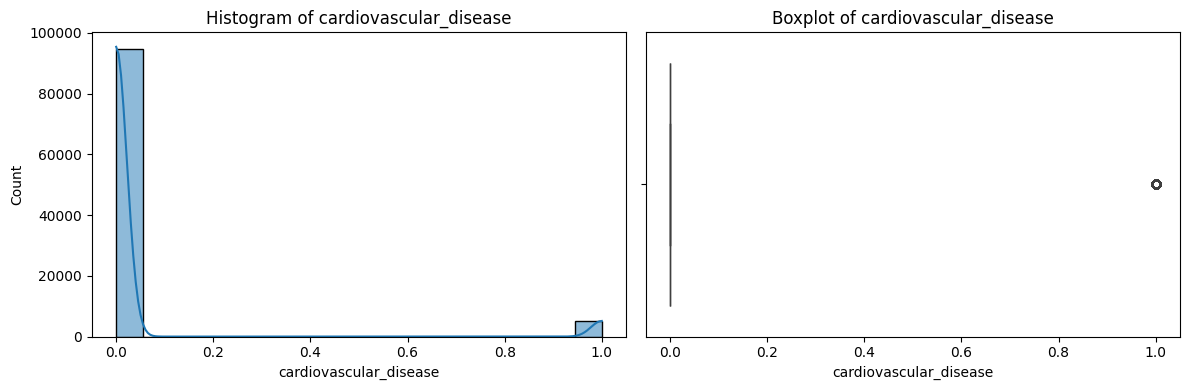

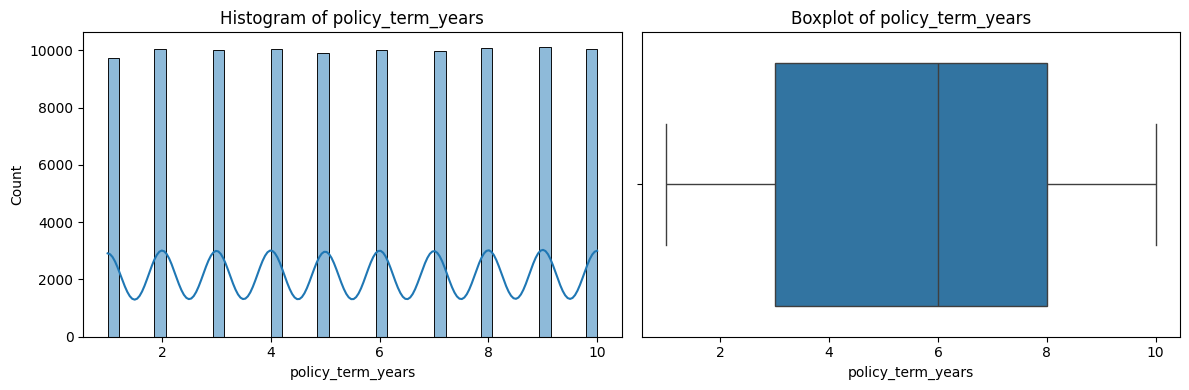

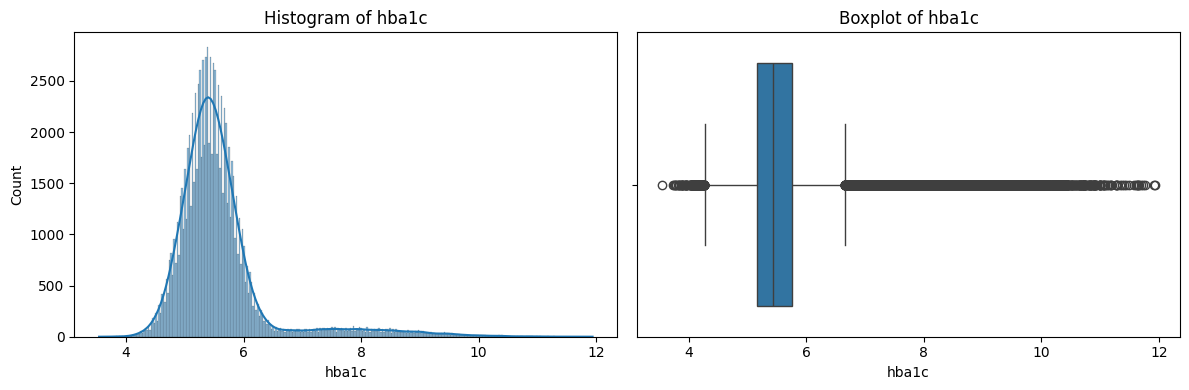

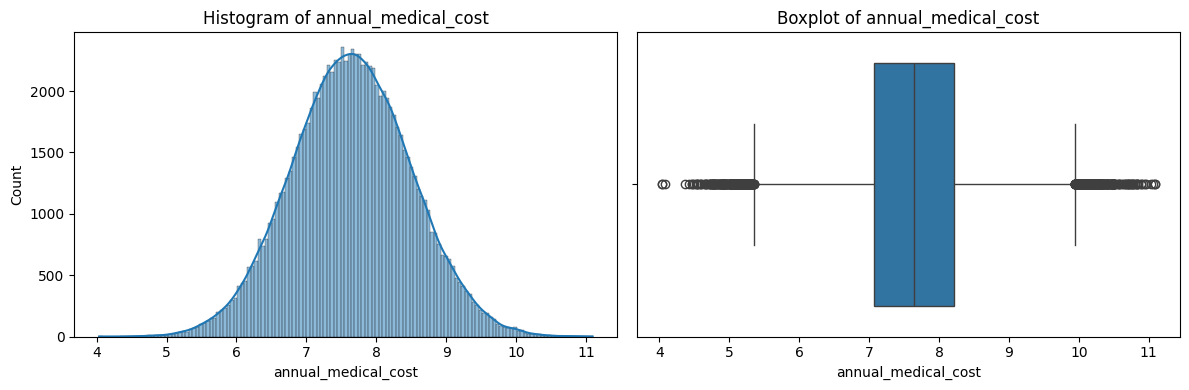

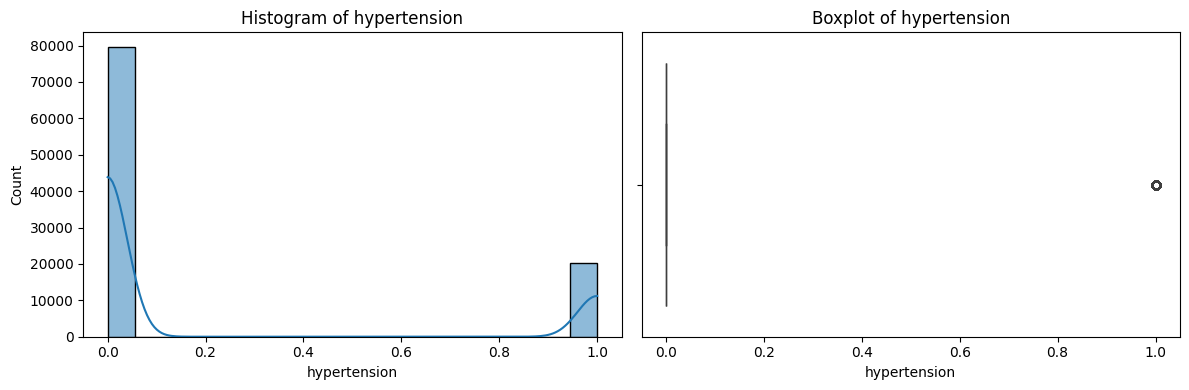

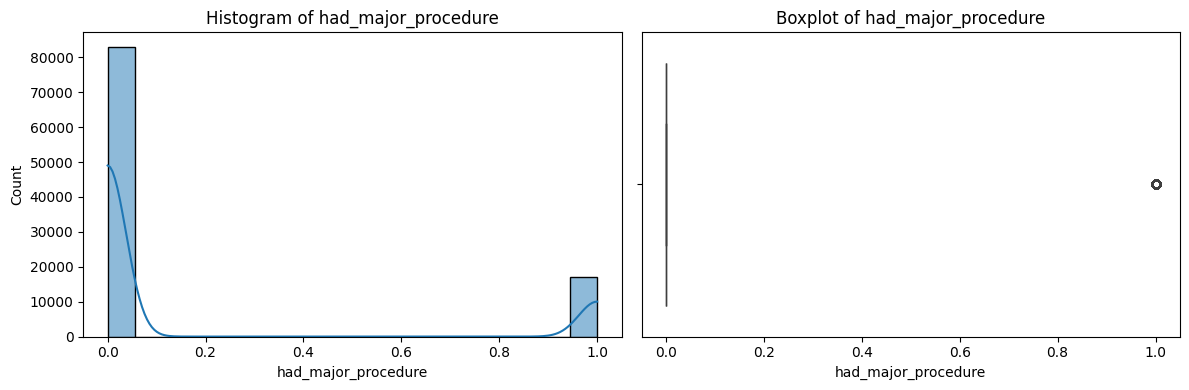

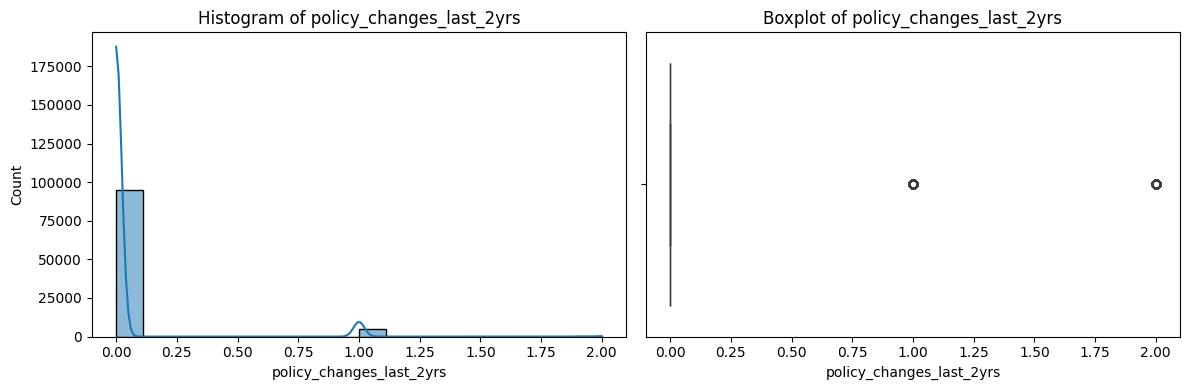

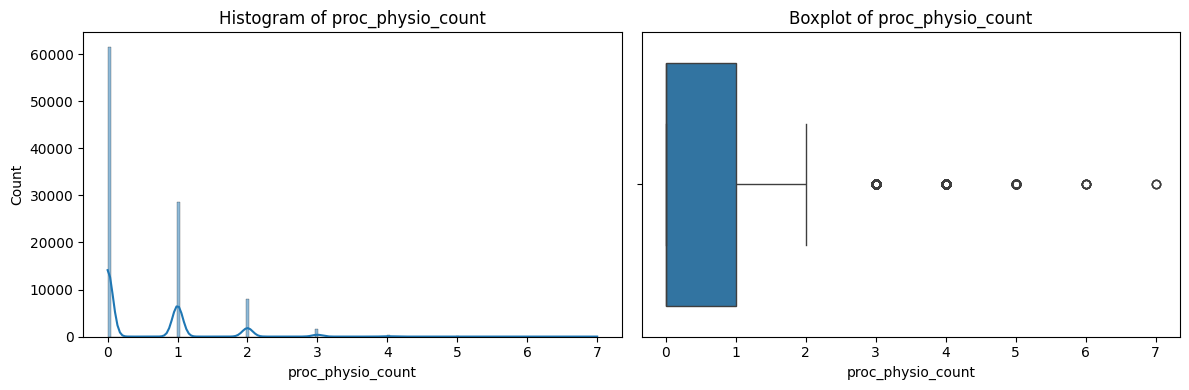

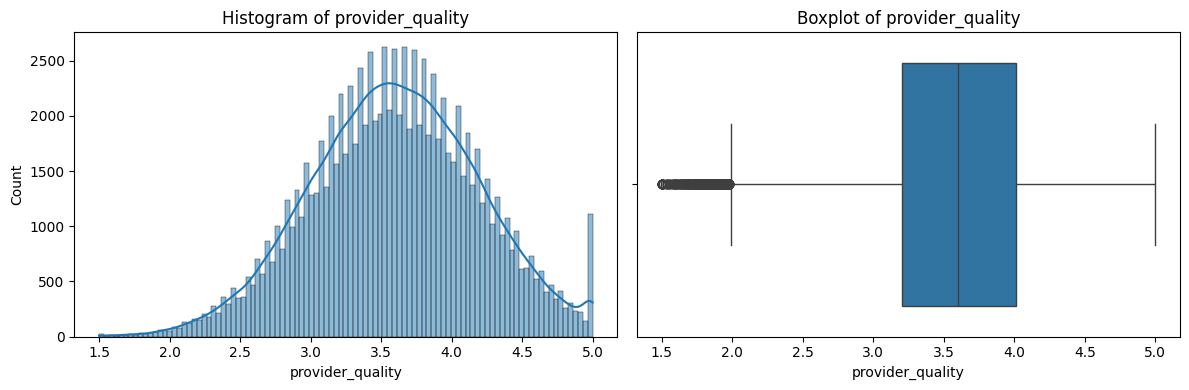

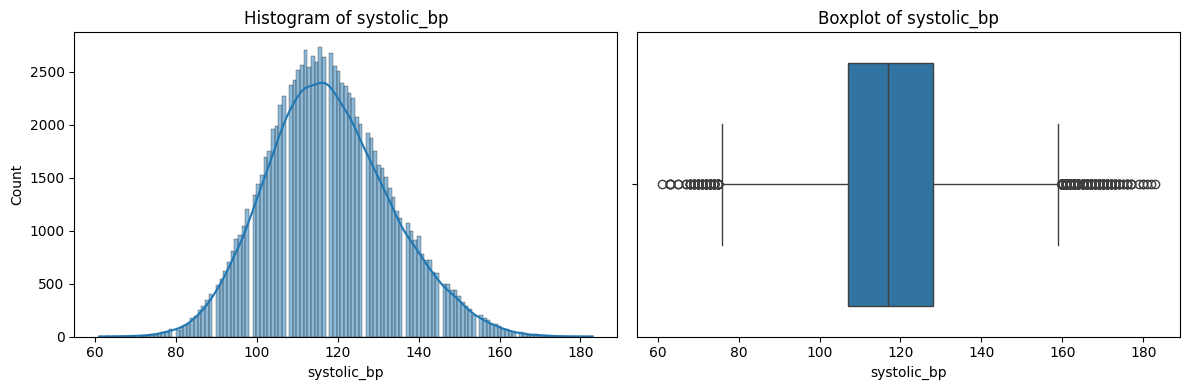

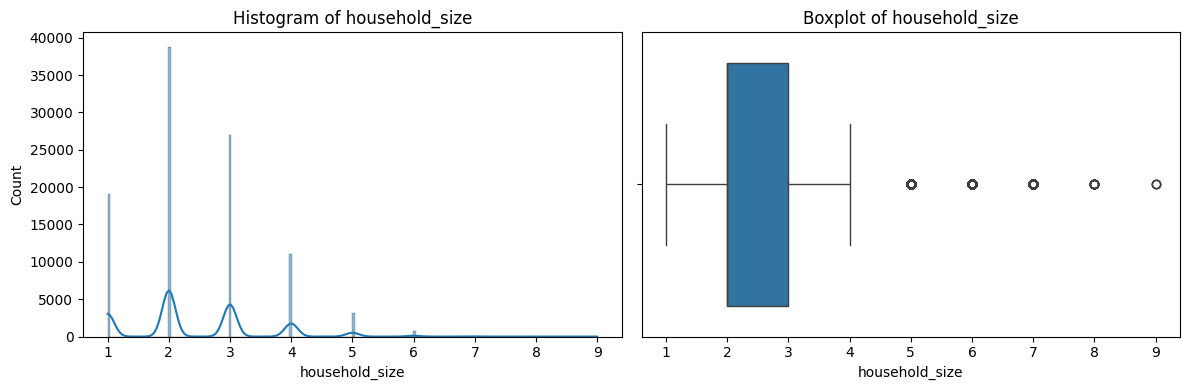

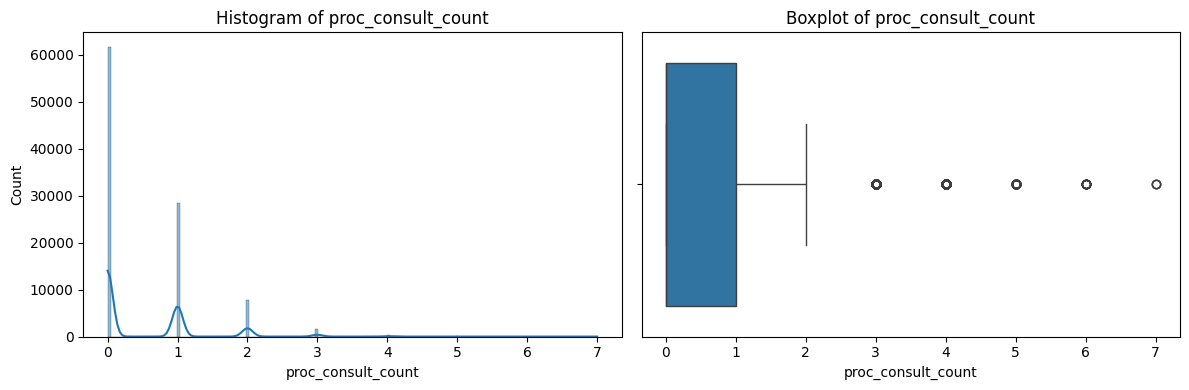

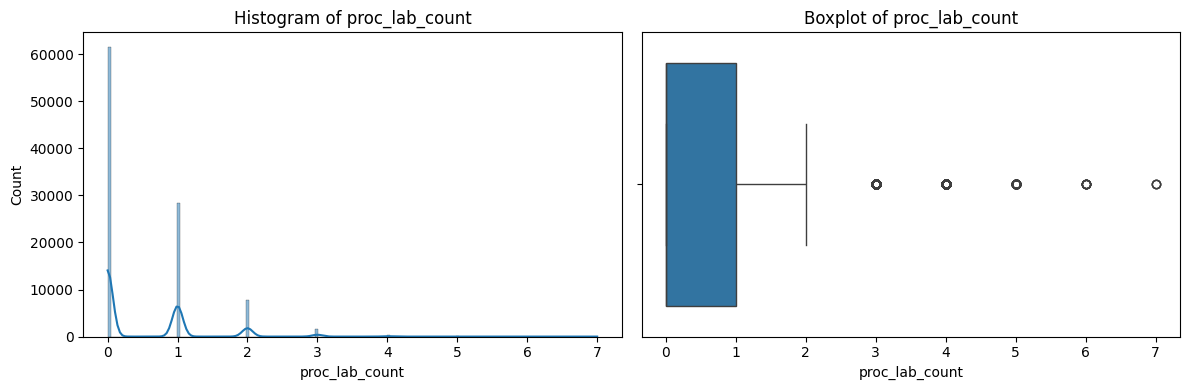

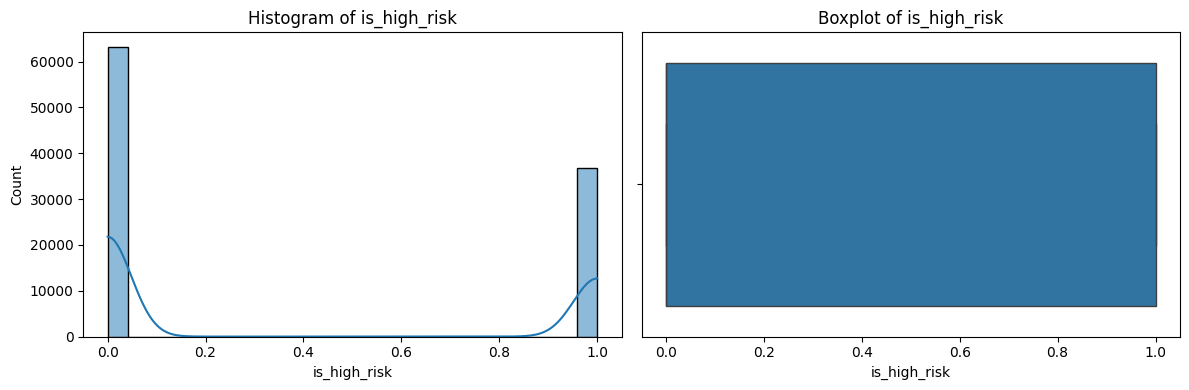

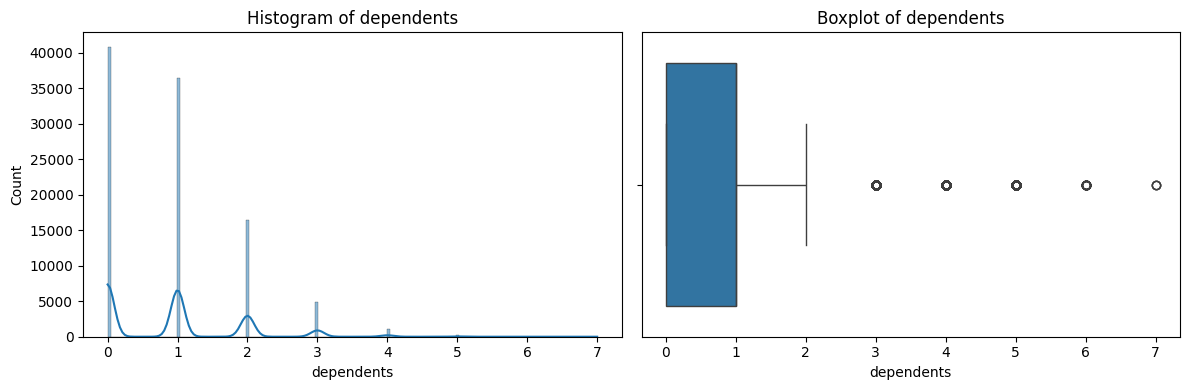

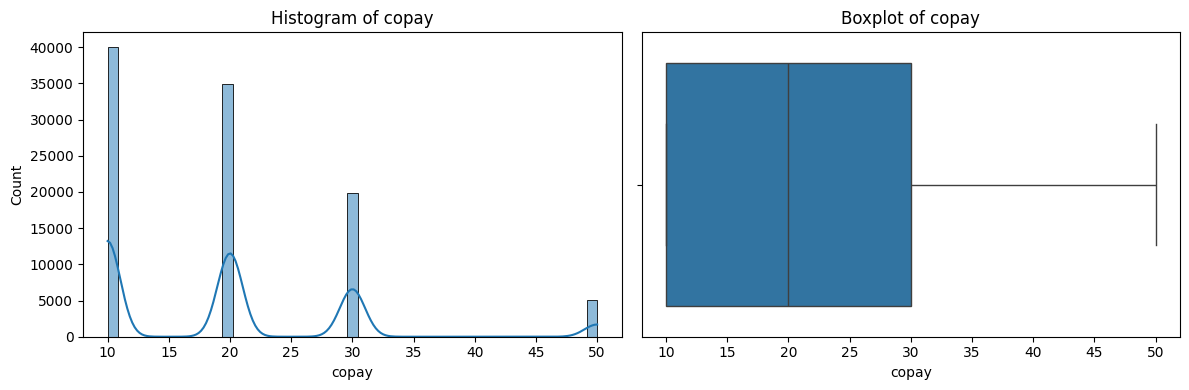

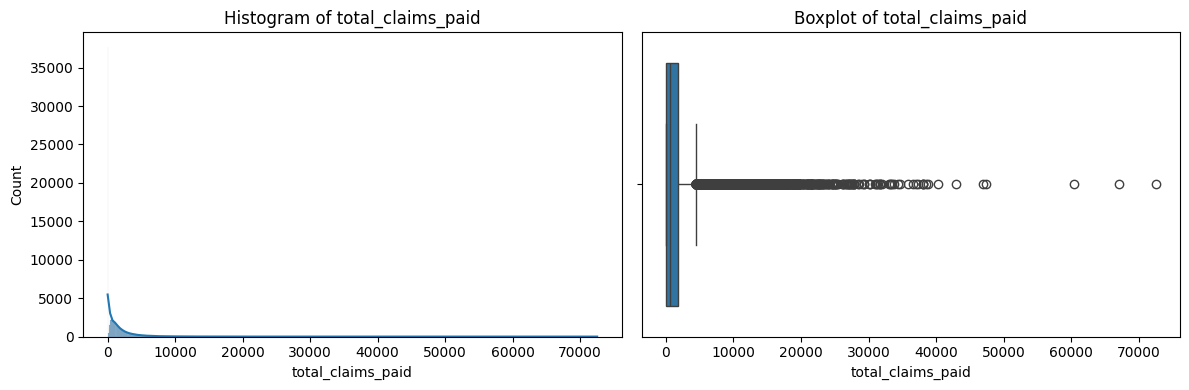

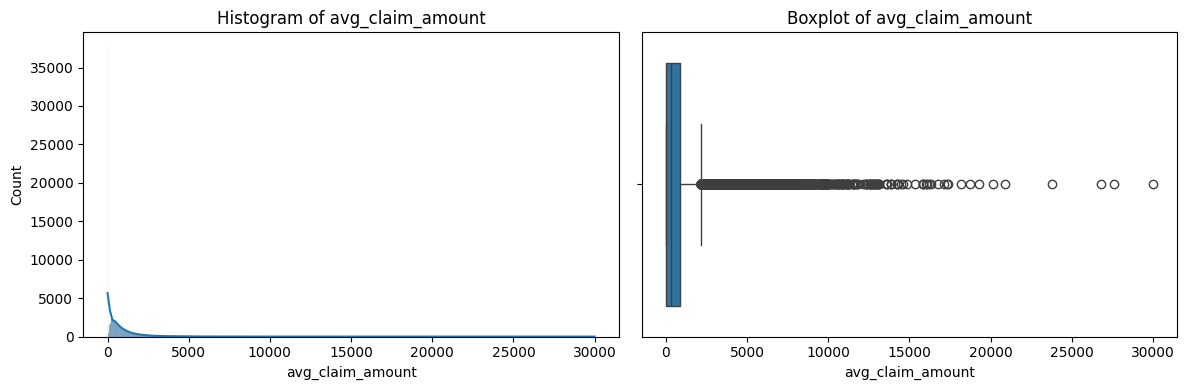

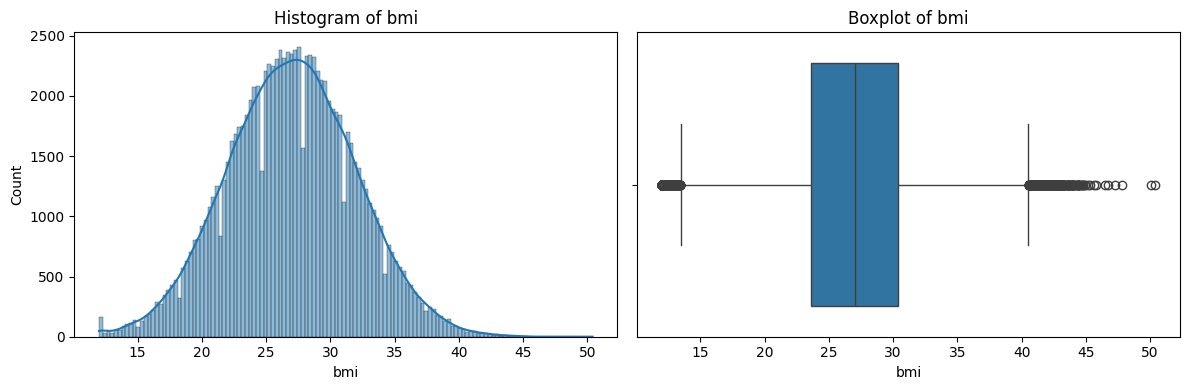

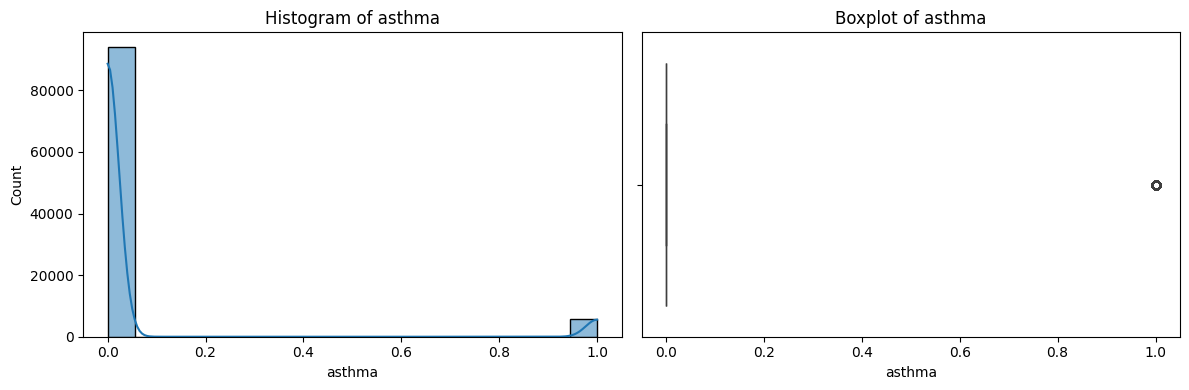

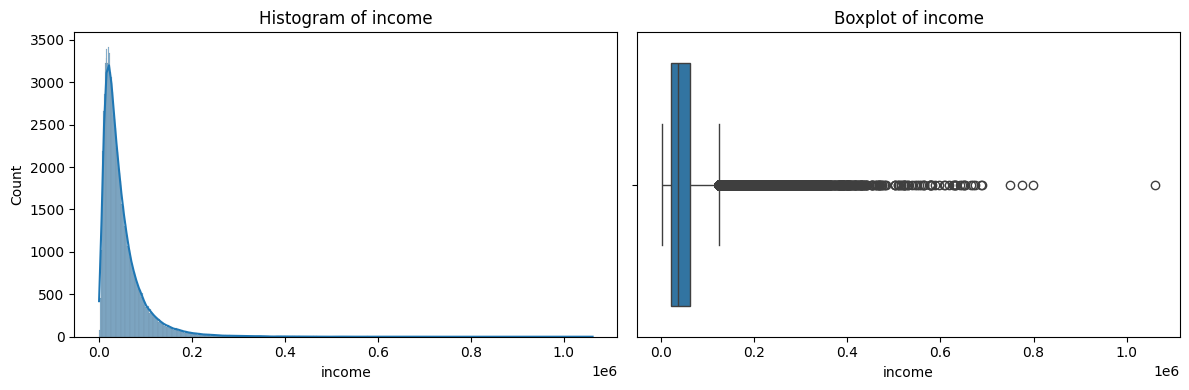

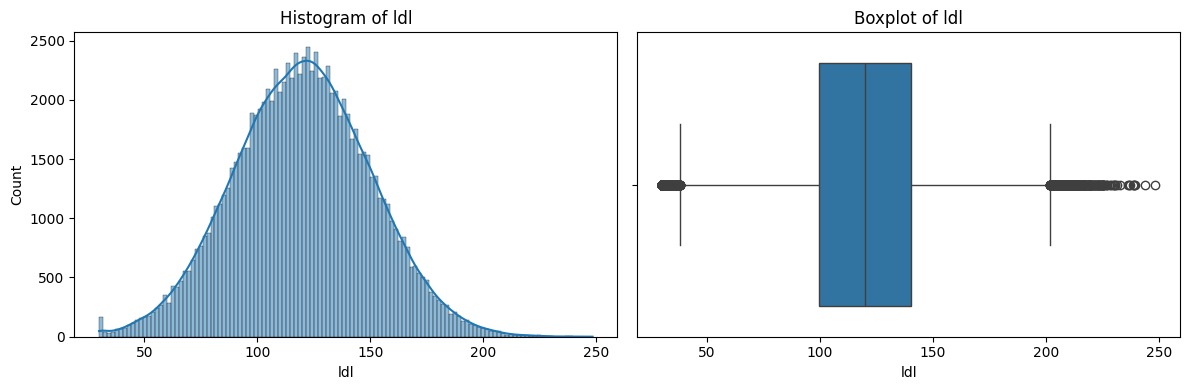

In [18]:
for col in numerical_columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

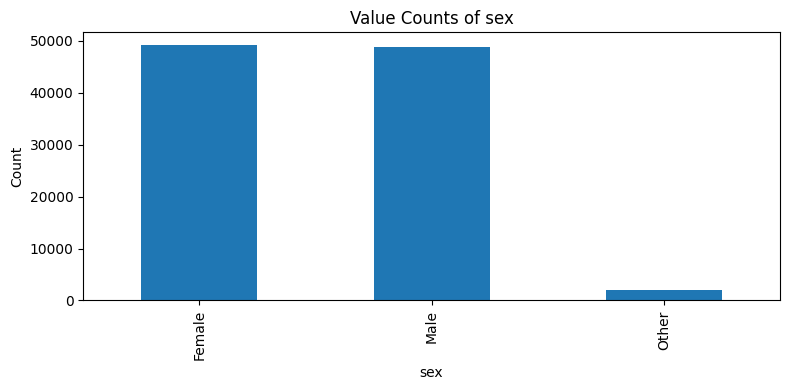

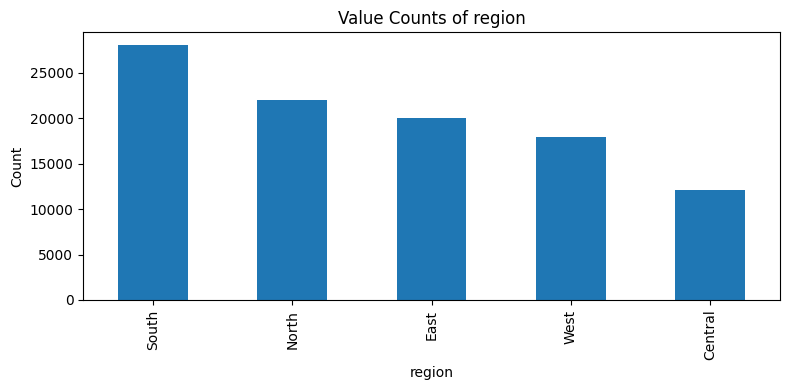

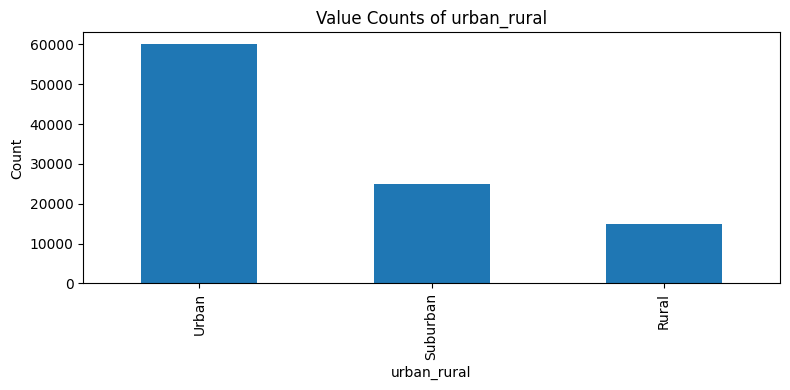

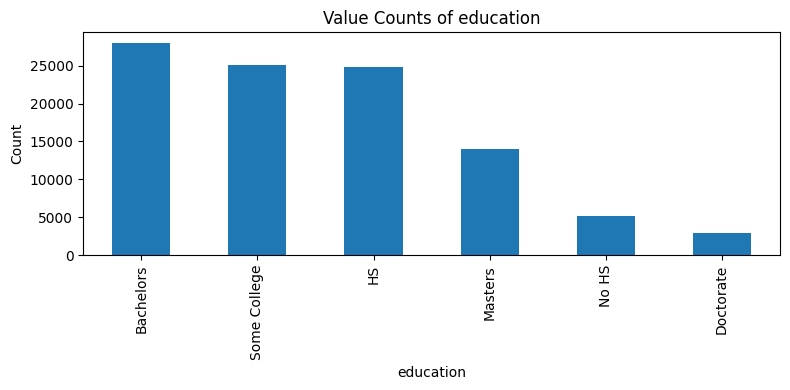

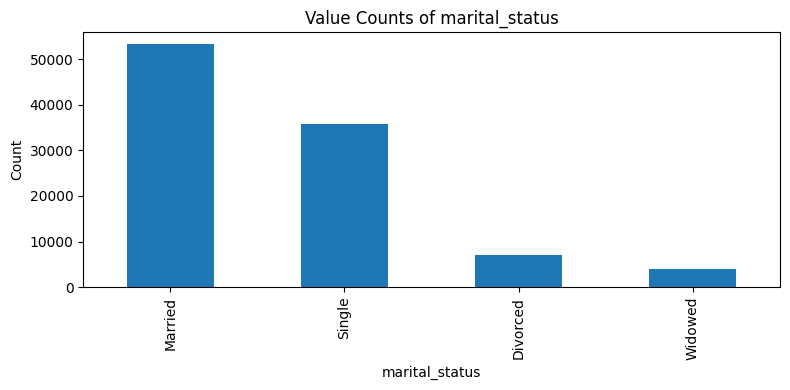

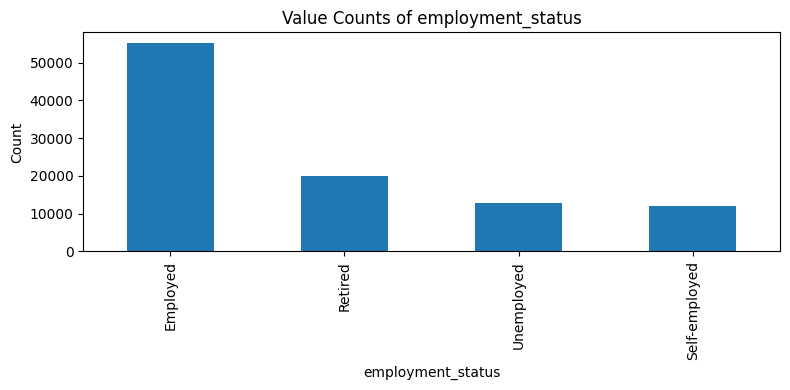

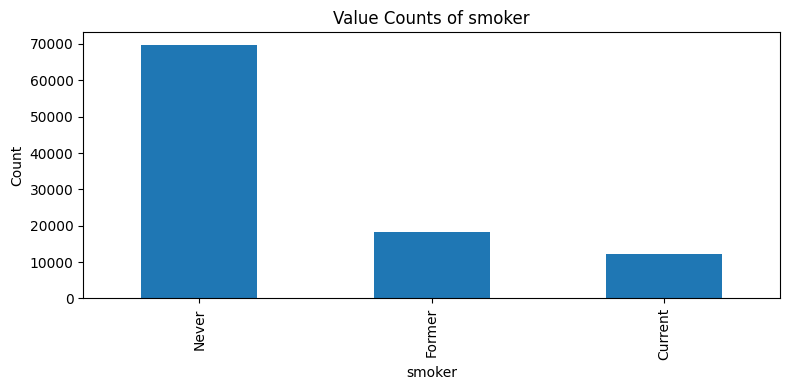

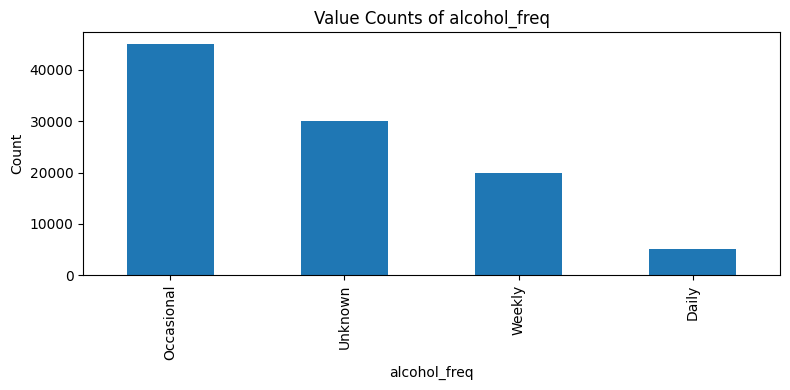

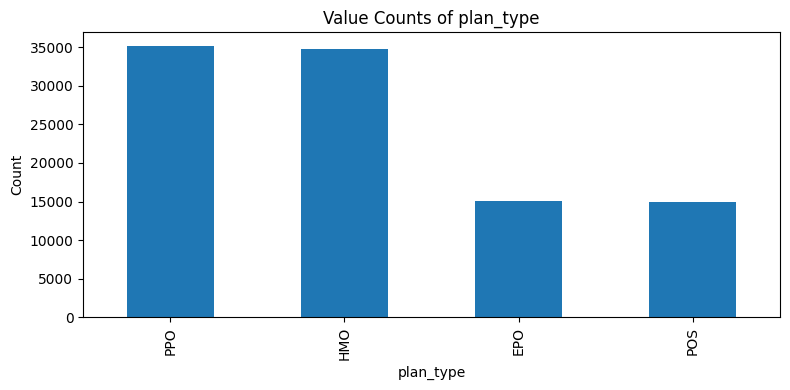

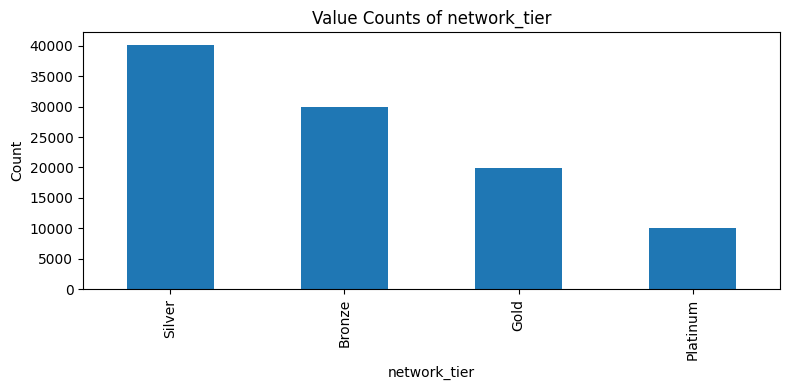

In [19]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))

    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [20]:
df[numerical_columns].describe()

,hospitalizations_last_3yrs,mental_health,deductible,kidney_disease,medication_count,cancer_history,claims_count,diabetes,proc_imaging_count,days_hospitalized_last_3yrs,...,proc_lab_count,is_high_risk,dependents,copay,total_claims_paid,avg_claim_amount,bmi,asthma,income,ldl
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,0.093640,0.130140,1226.725000,0.014620,1.236320,0.021510,1.62178,0.085930,0.508530,0.373350,...,0.509140,0.367810,0.898380,19.520400,1377.878827,656.512084,26.990512,0.058870,4.987390e+04,119.975065
std,0.304848,0.336459,1019.619375,0.120027,1.209358,0.145078,2.02982,0.280262,0.749755,1.373011,...,0.750455,0.482212,0.950654,10.286255,2305.464687,1072.660048,4.994883,0.235382,4.680021e+04,30.262086
min,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,12.000000,0.000000,1.100000e+03,30.000000
25%,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,23.600000,0.000000,2.110000e+04,99.400000
50%,0.000000,0.000000,1000.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,20.000000,642.545000,318.015000,27.000000,0.000000,3.620000e+04,120.000000
75%,0.000000,0.000000,2000.000000,0.000000,2.000000,0.000000,2.00000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,30.000000,1795.522500,872.215000,30.400000,0.000000,6.220000e+04,140.300000
max,3.000000,1.000000,5000.000000,1.000000,11.000000,1.000000,23.00000,1.000000,7.000000,21.000000,...,7.000000,1.000000,7.000000,50.000000,72517.950000,30010.530000,50.400000,1.000000,1.061800e+06,248.300000


In [21]:
df[categorical_columns].describe()

,sex,region,urban_rural,education,marital_status,employment_status,smoker,alcohol_freq,plan_type,network_tier
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,3,5,3,6,4,4,3,4,4,4
top,Female,South,Urban,Bachelors,Married,Employed,Never,Occasional,PPO,Silver
freq,49193,28029,60019,27996,53252,55269,69709,45078,35167,40177


In [22]:
df['proc_surgery_count'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [23]:
df['hospitalizations_last_3yrs'].unique()

array([0, 1, 2, 3])

In [24]:
df['total_claims_paid'].nunique()

56650

In [25]:
df['avg_claim_amount'].unique()

array([4672.59,  297.27,    0.  , ..., 1414.65,   72.25,  552.38])

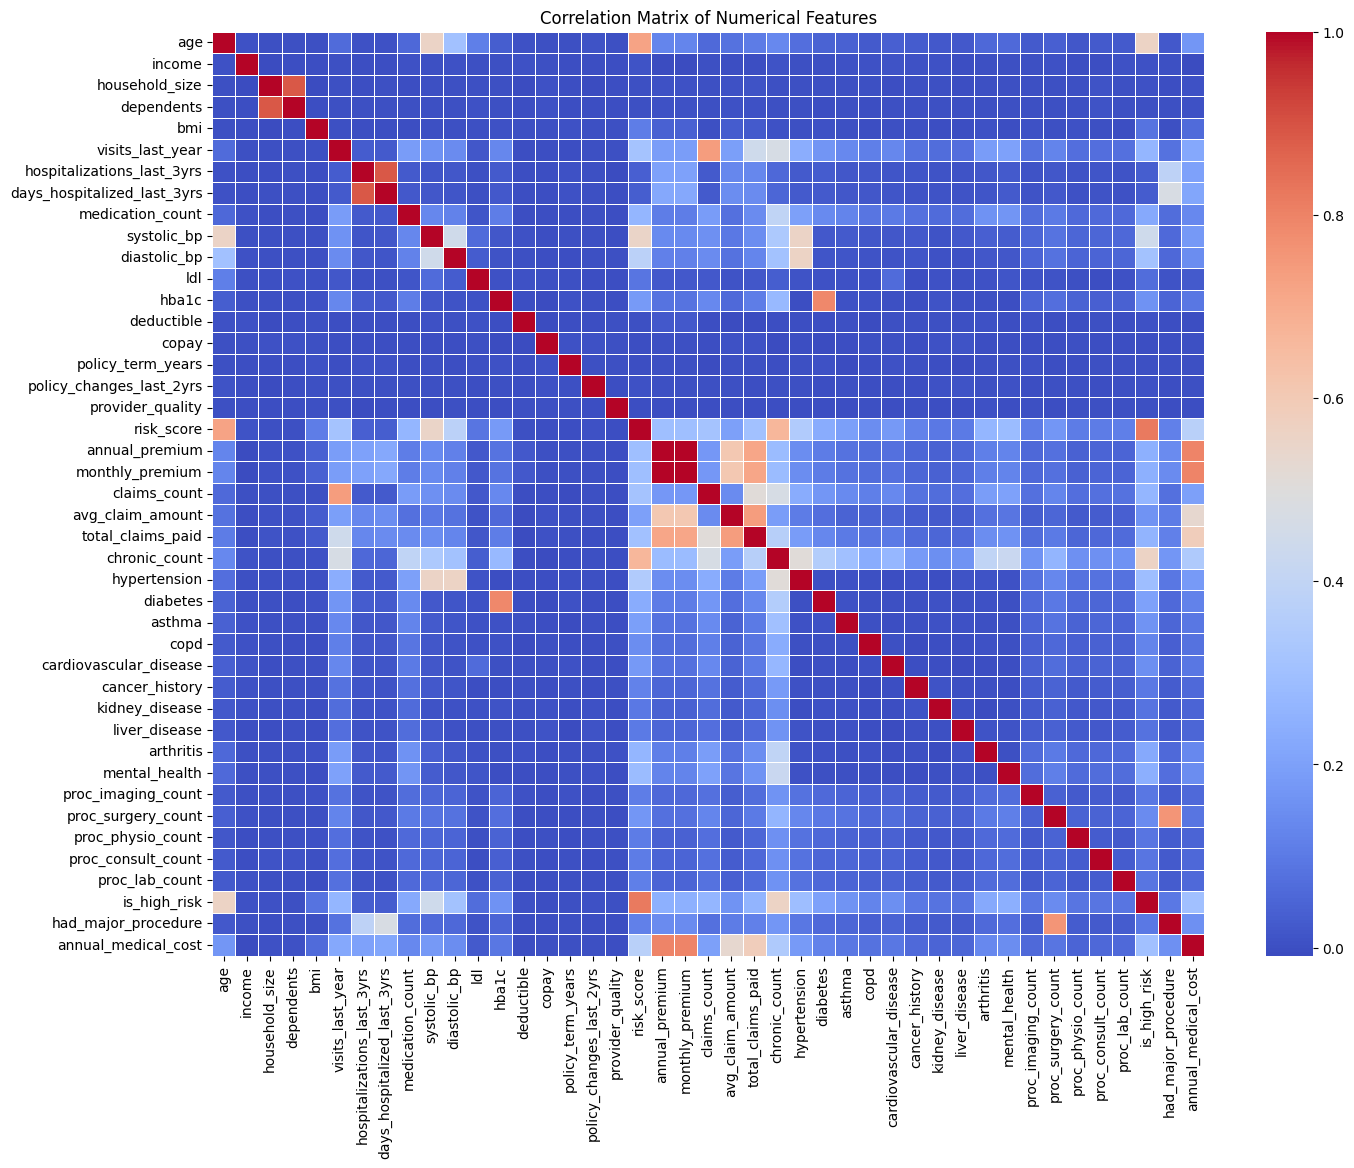

In [26]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [27]:
target_corr = corr['annual_medical_cost'].sort_values(ascending=False)

print("Top 15 features most positively correlated with the target:")
print(target_corr.head(15))

print("\nTop 15 features most negatively correlated with the target:")
print(target_corr.tail(15))

Top 15 features most positively correlated with the target:
annual_medical_cost            1.000000
annual_premium                 0.795388
monthly_premium                0.795388
total_claims_paid              0.585899
avg_claim_amount               0.533532
risk_score                     0.372094
chronic_count                  0.341937
is_high_risk                   0.299999
visits_last_year               0.221041
days_hospitalized_last_3yrs    0.215776
hospitalizations_last_3yrs     0.202458
claims_count                   0.197156
hypertension                   0.181360
systolic_bp                    0.178339
age                            0.169880
Name: annual_medical_cost, dtype: float64

Top 15 features most negatively correlated with the target:
proc_imaging_count          0.058745
proc_lab_count              0.058190
proc_consult_count          0.057263
liver_disease               0.053883
kidney_disease              0.048272
proc_physio_count           0.048132
ldl            

In [28]:
!pip install statsmodels

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('annual_medical_cost') 

X = df[numerical_columns]


X_const = add_constant(X)

vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]


vif = vif.sort_values(by='VIF', ascending=False)

print(vif)


C:\Users\ninah\anaconda3\envs\datasciencejosepy\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        Feature           VIF
27                     diabetes           inf
33                liver_disease           inf
34                    arthritis           inf
35                mental_health           inf
28                       asthma           inf
29                         copd           inf
30       cardiovascular_disease           inf
31               cancer_history           inf
32               kidney_disease           inf
25                chronic_count           inf
26                 hypertension           inf
21              monthly_premium  1.309565e+08
20               annual_premium  1.309564e+08
0                         const  3.990448e+02
19                   risk_score  9.870281e+00
8   days_hospitalized_last_3yrs  6.364401e+00
24            total_claims_paid  4.900524e+00
42          had_major_procedure  4.771504e+00
7    hospitalizations_last_3yrs  4.768820e+00
1                           age  4.767299e+00
3                household_size  4

#  Drop Perfectly Collinear Features (VIF = ∞)

These features are redundant because their information is already captured by other variables.

**Example:**
- Features that are linear combinations of other variables
- Identical features with different names
- Derived features that don't add new information


- Increases model complexity without improving performance
- Can cause numerical instability in calculations
- Makes interpretation more difficult


- Remove features with VIF = ∞ (perfect multicollinearity)
- Keep only one representative from each group of perfectly correlated features

In [30]:
drop_inf_cols = [
    'diabetes', 'liver_disease', 'arthritis', 'mental_health', 'asthma', 
    'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease'
]
df = df.drop(columns=drop_inf_cols)


**Issue:** `monthly_premium` and `annual_premium` show:
- Extremely high VIF values
- Near-perfect correlation

**Solution:** Retain only one feature (e.g., `annual_premium`)

**Rationale:**
- Eliminates redundancy while preserving essential information
- Reduces multicollinearity issues
- Maintains predictive power with fewer features

In [31]:
df = df.drop(columns=['monthly_premium'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  object 
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  object 
 12  alcohol_freq                 100000 non-null  object 
 13  

In [33]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = list(set(df.columns) - set(categorical_columns))

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

Numerical Columns:
['hospitalizations_last_3yrs', 'deductible', 'medication_count', 'claims_count', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'annual_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'policy_term_years', 'hba1c', 'annual_medical_cost', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'income', 'ldl']


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[numerical_columns])  # numerical_columns = remaining numeric columns
vif = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)

                        Feature         VIF
0                         const  506.812781
1    hospitalizations_last_3yrs    4.772312
2                    deductible    1.003081
3              medication_count    1.185844
4                  claims_count    3.031449
5            proc_imaging_count    1.027054
6   days_hospitalized_last_3yrs    6.363762
7                 chronic_count    4.615706
8                annual_premium    4.063777
9            proc_surgery_count    3.840117
10                          age    4.775606
11                   risk_score    9.986380
12             visits_last_year    2.334705
13                 diastolic_bp    1.626501
14            policy_term_years    1.000330
15                        hba1c    1.117138
16          annual_medical_cost    2.988242
17                 hypertension    2.517133
18          had_major_procedure    4.774702
19     policy_changes_last_2yrs    1.000231
20            proc_physio_count    1.024215
21             provider_quality 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  object 
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  object 
 12  alcohol_freq                 100000 non-null  object 
 13  

# Final Dataset Overview

The final dataset contains **100,000 patient records** and **43 features**, including demographics, clinical measurements, healthcare utilization, insurance details, lifestyle factors, and the target variable for regression.

---

## Dataset Composition

- **Numerical Features (21 columns)**: Include continuous and discrete variables such as:
  - Age, BMI, blood pressure (systolic/diastolic)
  - Lab results: LDL, HbA1c
  - Healthcare utilization: visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs
  - Insurance and claims: annual_premium, monthly premiums, total_claims_paid, avg_claim_amount, deductible, copay
  - Medical procedures: proc_imaging_count, proc_surgery_count, proc_physio_count, proc_consult_count, proc_lab_count
  - Health indicators: chronic_count, hypertension, is_high_risk, had_major_procedure, risk_score

- **Categorical Features (10 columns)**: Include variables such as:
  - Sex, region, urban_rural
  - Education, marital_status, employment_status
  - Smoker, alcohol_freq
  - Plan type and network tier

- **Target Variable**:  
  - `annual_medical_cost` — the continuous variable we aim to predict with our regression model.

---

## Key Notes

- The dataset is **clean and complete**: no missing values remain after preprocessing.
- All categorical features are of type `object` and ready for encoding.
- Numerical features are ready for scaling or further transformations if needed.
- This dataset is now prepared for **train-validation-test splitting** and subsequent regression modeling.



## 1. Split the dataset

# Splitting the Dataset

Before building the regression model, we split the dataset into **training, validation, and test sets** to ensure proper evaluation and prevent data leakage.

---

## Split Strategy

1. **Full Train + Validation (80%) and Test (20%)**
   - The dataset is first split into **80% for training and validation** and **20% for testing**.  
   - This ensures that the test set remains unseen during model training.

2. **Training (60%) and Validation (20%)**
   - The 80% training+validation subset is further split into:
     - **Training set:** 60% of the total dataset
     - **Validation set:** 20% of the total dataset
   - This allows tuning hyperparameters and evaluating models before testing on unseen data.

3. **Index Reset**
   - After splitting, we reset the indices of all subsets for consistency.

---

## Dataset Sizes

| Dataset           | Number of Records |
|------------------|-----------------|
| Full Train + Val  | 80,000           |
| Training          | 60,000           |
| Validation        | 20,000           |
| Test              | 20,000           |

This split ensures a robust workflow for model training, hyperparameter tuning, and final evaluation.


In [36]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% train+val and 20% test
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the full train into train (60%) and validation (20%) 
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Reset indices
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
full_train_df.reset_index(drop=True, inplace=True)

# Check lengths
len(full_train_df), len(train_df), len(val_df), len(test_df)

(80000, 60000, 20000, 20000)

In [37]:
y_train = train_df['annual_medical_cost'].values
y_val = val_df['annual_medical_cost'].values
y_test = test_df['annual_medical_cost'].values
y_full_train = full_train_df['annual_medical_cost'].values

In [38]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = list(set(df.columns) - set(categorical_columns))

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

Numerical Columns:
['hospitalizations_last_3yrs', 'deductible', 'medication_count', 'claims_count', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'annual_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'policy_term_years', 'hba1c', 'annual_medical_cost', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'income', 'ldl']


### Feature Engineering: 

# Encoding Features with DictVectorizer

To prepare the data for machine learning models:

1. **Combine numerical and categorical features**.  
2. **Drop the target variable** (`annual_medical_cost`) from the numerical features.  
3. **Convert the datasets to a list of dictionaries** to use with `DictVectorizer`.  
4. **Fit the `DictVectorizer` on the training set** and transform all datasets to get feature matrices ready for modeling.

---


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  object 
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  object 
 12  alcohol_freq                 100000 non-null  object 
 13  

In [40]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = list(set(df.columns) - set(categorical_columns))

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

Numerical Columns:
['hospitalizations_last_3yrs', 'deductible', 'medication_count', 'claims_count', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'annual_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'policy_term_years', 'hba1c', 'annual_medical_cost', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'income', 'ldl']


In [41]:
categorical_features = list(categorical_columns)
numerical_features = list(numerical_columns)

In [42]:
numerical_features

['hospitalizations_last_3yrs',
 'deductible',
 'medication_count',
 'claims_count',
 'proc_imaging_count',
 'days_hospitalized_last_3yrs',
 'chronic_count',
 'annual_premium',
 'proc_surgery_count',
 'age',
 'risk_score',
 'visits_last_year',
 'diastolic_bp',
 'policy_term_years',
 'hba1c',
 'annual_medical_cost',
 'hypertension',
 'had_major_procedure',
 'policy_changes_last_2yrs',
 'proc_physio_count',
 'provider_quality',
 'systolic_bp',
 'household_size',
 'proc_consult_count',
 'proc_lab_count',
 'is_high_risk',
 'dependents',
 'copay',
 'total_claims_paid',
 'avg_claim_amount',
 'bmi',
 'income',
 'ldl']

In [43]:
#We have to remove the target annual medical cost 
numerical_features.remove('annual_medical_cost')

In [44]:
print(numerical_features)
print(categorical_features)

total_features = len(numerical_features) + len(categorical_features)
print(total_features)

['hospitalizations_last_3yrs', 'deductible', 'medication_count', 'claims_count', 'proc_imaging_count', 'days_hospitalized_last_3yrs', 'chronic_count', 'annual_premium', 'proc_surgery_count', 'age', 'risk_score', 'visits_last_year', 'diastolic_bp', 'policy_term_years', 'hba1c', 'hypertension', 'had_major_procedure', 'policy_changes_last_2yrs', 'proc_physio_count', 'provider_quality', 'systolic_bp', 'household_size', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'dependents', 'copay', 'total_claims_paid', 'avg_claim_amount', 'bmi', 'income', 'ldl']
['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']
42


In [45]:
from sklearn.feature_extraction import DictVectorizer

# Combine numerical + categorical features

features = numerical_features + categorical_features

# Convert dataframes to list of dictionaries
train_dict = train_df[features].to_dict(orient='records')
val_dict = val_df[features].to_dict(orient='records')
test_dict = test_df[features].to_dict(orient='records')
full_train_dict = full_train_df[features].to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# Fit on training data and transform
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)
X_full_train = dv.transform(full_train_dict)

# Check shape
X_train.shape


(60000, 72)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
lr = LinearRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Make predictions
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {dataset_name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}\n")

# Evaluate on train, validation, and test sets
evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_val, y_val_pred, "Validation Set")
evaluate_model(y_test, y_test_pred, "Test Set")


--- Training Set ---
RMSE: 0.48
MAE: 0.35
R²: 0.6813

--- Validation Set ---
RMSE: 0.46
MAE: 0.35
R²: 0.6984

--- Test Set ---
RMSE: 0.48
MAE: 0.35
R²: 0.6845



In [47]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Function to evaluate performance
def evaluate(y_true, y_pred, dataset_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {dataset_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}\n")

# Ridge Regression
ridge = Ridge(random_state=42)
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
ridge_grid.fit(X_train, y_train)

print("Ridge Best Parameters:", ridge_grid.best_params_)
print("Ridge Best CV R²:", ridge_grid.best_score_)

# Predictions
y_train_pred = ridge_grid.predict(X_train)
y_val_pred = ridge_grid.predict(X_val)
y_test_pred = ridge_grid.predict(X_test)

# Evaluate Ridge
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_val, y_val_pred, "Validation Set")
evaluate(y_test, y_test_pred, "Test Set")

# Lasso Regression
lasso = Lasso(random_state=42, max_iter=10000)
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)
lasso_grid.fit(X_train, y_train)

print("Lasso Best Parameters:", lasso_grid.best_params_)
print("Lasso Best CV R²:", lasso_grid.best_score_)

# Predictions
y_train_pred_lasso = lasso_grid.predict(X_train)
y_val_pred_lasso = lasso_grid.predict(X_val)
y_test_pred_lasso = lasso_grid.predict(X_test)

# Evaluate Lasso
evaluate(y_train, y_train_pred_lasso, "Training Set (Lasso)")
evaluate(y_val, y_val_pred_lasso, "Validation Set (Lasso)")
evaluate(y_test, y_test_pred_lasso, "Test Set (Lasso)")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Ridge Best Parameters: {'alpha': 1}
Ridge Best CV R²: 0.6802029687410277
--- Training Set ---
RMSE: 0.4827
MAE: 0.3542
R²: 0.6813

--- Validation Set ---
RMSE: 0.4616
MAE: 0.3494
R²: 0.6984

--- Test Set ---
RMSE: 0.4782
MAE: 0.3518
R²: 0.6845

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Lasso Best Parameters: {'alpha': 0.0001}
Lasso Best CV R²: 0.6802465140209291
--- Training Set (Lasso) ---
RMSE: 0.4827
MAE: 0.3542
R²: 0.6813

--- Validation Set (Lasso) ---
RMSE: 0.4616
MAE: 0.3494
R²: 0.6984

--- Test Set (Lasso) ---
RMSE: 0.4782
MAE: 0.3518
R²: 0.6845



# Final Ridge Regression Model — Training & Evaluation

After tuning and selecting the best hyperparameter (`alpha=1`), we train the final Ridge regression model on the full training dataset and evaluate its performance on the test set.

## Steps

1. **Initialize** the Ridge model with the selected alpha value
2. **Fit** the model on the full training data (`X_full_train` and `y_full_train`)
3. **Make predictions** for both training and test datasets
4. **Evaluate performance** using key regression metrics:
   - **RMSE** (Root Mean Squared Error): Measures average prediction error in the same units as the target
   - **MAE** (Mean Absolute Error): Average absolute difference between predicted and true values
   - **R²** (Coefficient of Determination): Proportion of variance explained by the model

## Benefits of Using the Final Ridge Model

- **Combines all available training data** for better generalization
- **Regularization via Ridge** (L2 penalty) reduces overfitting while maintaining interpretability
- **Provides a robust baseline** for predicting annual medical costs before exploring more complex models

In [48]:


ridge_final = Ridge(alpha=1, random_state=42)


ridge_final.fit(X_full_train, y_full_train)


y_train_pred = ridge_final.predict(X_full_train)
y_test_pred = ridge_final.predict(X_test)

def evaluate(y_true, y_pred, dataset_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {dataset_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}\n")

# Evaluate on training and test sets
evaluate(y_full_train, y_train_pred, "Training Set")
evaluate(y_test, y_test_pred, "Test Set")


--- Training Set ---
RMSE: 0.4773
MAE: 0.3508
R²: 0.6857

--- Test Set ---
RMSE: 0.4778
MAE: 0.3495
R²: 0.6849



In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
# Predictions
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)
y_test_pred = dt.predict(X_test)

# Metrics function
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Training Set
rmse_train, mae_train, r2_train = evaluate(y_train, y_train_pred)

# Validation Set
rmse_val, mae_val, r2_val = evaluate(y_val, y_val_pred)

# Test Set
rmse_test, mae_test, r2_test = evaluate(y_test, y_test_pred)

print(f"--- Training Set ---\nRMSE: {rmse_train:.4f}\nMAE: {mae_train:.4f}\nR²: {r2_train:.4f}")
print(f"\n--- Validation Set ---\nRMSE: {rmse_val:.4f}\nMAE: {mae_val:.4f}\nR²: {r2_val:.4f}")
print(f"\n--- Test Set ---\nRMSE: {rmse_test:.4f}\nMAE: {mae_test:.4f}\nR²: {r2_test:.4f}")


--- Training Set ---
RMSE: 0.0000
MAE: 0.0000
R²: 1.0000

--- Validation Set ---
RMSE: 0.0135
MAE: 0.0024
R²: 0.9997

--- Test Set ---
RMSE: 0.0091
MAE: 0.0023
R²: 0.9999


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50]
}


dt = DecisionTreeRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_r2 = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best CV R²:", best_cv_r2)


final_dt = DecisionTreeRegressor(**best_params, random_state=42)
final_dt.fit(X_full_train, y_full_train)


def evaluate(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"--- {dataset_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}\n")
    
evaluate(final_dt, X_train, y_train, "Training Set")
evaluate(final_dt, X_val, y_val, "Validation Set")
evaluate(final_dt, X_test, y_test, "Test Set")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV R²: 0.9996221275810857
--- Training Set ---
RMSE: 0.0053
MAE: 0.0016
R²: 1.0000

--- Validation Set ---
RMSE: 0.0046
MAE: 0.0015
R²: 1.0000

--- Test Set ---
RMSE: 0.0094
MAE: 0.0023
R²: 0.9999



                  Feature    Importance
0          annual_premium  9.501565e-01
1     network_tier=Bronze  2.694710e-02
2     network_tier=Silver  1.248947e-02
3              deductible  6.329239e-03
4   network_tier=Platinum  2.785413e-03
5       network_tier=Gold  1.250436e-03
6             systolic_bp  1.939690e-05
7                     ldl  8.772558e-06
8              risk_score  3.353308e-06
9                   copay  3.255002e-06
10       provider_quality  2.014747e-06
11                    bmi  1.661810e-06
12                  hba1c  1.431262e-06
13    education=Doctorate  7.724700e-07
14          plan_type=EPO  4.258470e-07
15                 income  3.198344e-07
16           diastolic_bp  7.698738e-08
17                    age  7.013435e-08
18       avg_claim_amount  5.216215e-08
19      total_claims_paid  3.699098e-08


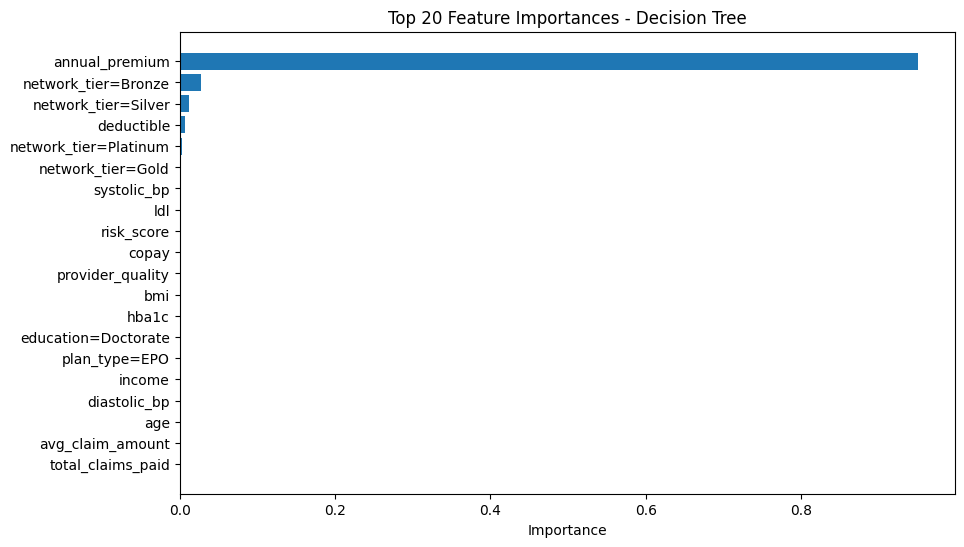

In [51]:
feature_names = dv.get_feature_names_out()


importances = final_dt.feature_importances_


feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


print(feat_imp.head(20))


plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'].head(20)[::-1], feat_imp['Importance'].head(20)[::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances - Decision Tree')
plt.show()


In [52]:
# from sklearn.ensemble import RandomForestRegressor


# param_grid_rf = {
#     'n_estimators': [100, 150],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 10],
#     'min_samples_leaf': [1, 5]
# }

# rf = RandomForestRegressor(random_state=42, n_jobs=-1)


# grid_search_rf = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid_rf,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search_rf.fit(X_train, y_train)

# best_params_rf = grid_search_rf.best_params_
# best_cv_r2_rf = grid_search_rf.best_score_
# print("Random Forest Best Parameters:", best_params_rf)
# print("Random Forest Best CV R²:", best_cv_r2_rf)

# final_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
# final_rf.fit(X_full_train, y_full_train)

# def evaluate(model, X, y, dataset_name="Dataset"):
#     y_pred = model.predict(X)
#     rmse = np.sqrt(mean_squared_error(y, y_pred))
#     mae = mean_absolute_error(y, y_pred)
#     r2 = r2_score(y, y_pred)
#     print(f"--- {dataset_name} ---")
#     print(f"RMSE: {rmse:.4f}")
#     print(f"MAE: {mae:.4f}")
#     print(f"R²: {r2:.4f}\n")
    
# evaluate(final_rf, X_train, y_train, "Training Set")
# evaluate(final_rf, X_val, y_val, "Validation Set")
# evaluate(final_rf, X_test, y_test, "Test Set")


# Model Selection: Decision Tree over Random Forest

## Decision
- **Chosen Model**: Decision Tree Regressor
- **Alternative Considered**: Random Forest Regressor

## Rationale

### Why Not Random Forest
- **Computational Constraints**: Impractically long training time
- **Large Dataset**: Resource-intensive for ensemble methods
- **Timeout Issues**: Could not complete in reasonable timeframe

### Why Decision Tree
- **Speed**: Significantly faster training
- **Performance**: Achieved near-perfect R² scores across all datasets
- **Non-linear Capture**: Effectively handles complex relationships in data
- **Superiority**: Outperformed linear regression models

## Outcome
Decision Tree provided excellent predictive performance while maintaining computational efficiency.